In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.options.mode.use_inf_as_na = True
import warnings
from  matplotlib.ticker import PercentFormatter
warnings.filterwarnings("ignore")

/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_77860/1985980386.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_77860/1985980386.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [5]:
test_set1 = 'real2_part1'
test_set2 = 'real2_part2'
data_folder = '/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv'
src_file1 = f'{data_folder}/{test_set1}_final.csv'
src_file2 = f'{data_folder}/{test_set2}_final.csv'

with open(src_file1) as x:
    ncols = len(x.readline().split('\t'))
print(f"Number of columns src1 {ncols}")
with open(src_file2) as x:
    ncols = len(x.readline().split('\t'))
print(f"Number of columns src2 {ncols}")

df_test1 = pd.read_csv(src_file1, delimiter='\t', usecols=range(1,ncols))
df_test2 = pd.read_csv(src_file2, delimiter='\t', usecols=range(1,ncols))
df_test = pd.concat([df_test1, df_test2], ignore_index=True)
df_test['Chr'] = df_test['Chr'].astype(str)
df_test

Number of columns src1 57
Number of columns src2 56


Chr  START_POS_REF  END_POS_REF REF ALT   REF_MFVdVs   ALT_MFVdVs  \
0       1          10291        10291   C   T   NA/NA/C/C/   NA/NA/T/T/   
1       1          10330        10330   C   A  NA/NA/NA/C/  NA/NA/NA/A/   
2       1          10700        10700   G   C  NA/G/NA/NA/  NA/C/NA/NA/   
3       1          12719        12719   G   C  NA/NA/NA/G/  NA/NA/NA/C/   
4       1          14574        14574   A   G    A/NA/A/A/    G/NA/G/G/   
...    ..            ...          ...  ..  ..          ...          ...   
86498   Y       59028442     59028442   G   A   NA/NA/G/G/   NA/NA/A/A/   
86499   Y       59029004     59029004   G   C    G/NA/G/G/    C/NA/C/C/   
86500   Y       59030255     59030255   G   A  G/NA/NA/NA/  A/NA/NA/NA/   
86501   Y       59031039     59031039   G   A  G/NA/NA/NA/  A/NA/NA/NA/   
86502   Y       59031530     59031530   C   T  C/NA/NA/NA/  T/NA/NA/NA/   

      Sample_Name FILTER_Mutect2 FILTER_Freebayes  ...        vs_GPV  \
0      icgc_mbl-T          False            False  ...  4.704900e-29   
1      icgc_mbl-T          False            False  ...  1.000000e+00   
2      icgc_mbl-T          False             True  ...           NaN   
3      icgc_mbl-T          False            False  ...  1.000000e+00   
4      icgc_mbl-T          False            False  ...  1.000000e+00   
...           ...            ...              ...  ...           ...   
86498  icgc_mbl-T          False            False  ...  1.000000e+00   
86499  icgc_mbl-T          False            False  ...  1.000000e+00   
86500  icgc_mbl-T           True            False  ...           NaN   
86501  icgc_mbl-T           True            False  ...           NaN   
86502  icgc_mbl-T           True            False  ...           NaN   

         vs_SPV  vs_SSC   vd_AF  vd_DP  vd_MSI  vd_SAMPLE   vd_SOR   vd_SSF  \
0      0.627830     2.0  0.2263  243.0     6.0        NaN      NaN  0.00000   
1      0.003559    24.0     NaN    NaN     NaN        NaN      NaN      NaN   
2           NaN     NaN     NaN    NaN     NaN        NaN      NaN      NaN   
3      0.043528    13.0     NaN    NaN     NaN        NaN      NaN      NaN   
4      0.004372    23.0  0.1111   99.0     2.0        NaN      NaN  0.03642   
...         ...     ...     ...    ...     ...        ...      ...      ...   
86498  0.024137    16.0  0.1582  177.0     2.0        NaN  2.03803  0.02385   
86499  0.032399    14.0  0.1353  266.0     2.0        NaN  2.35782  0.00946   
86500       NaN     NaN     NaN    NaN     NaN        NaN      NaN      NaN   
86501       NaN     NaN     NaN    NaN     NaN        NaN      NaN      NaN   
86502       NaN     NaN     NaN    NaN     NaN        NaN      NaN      NaN   

       vd_VD  
0       55.0  
1        NaN  
2        NaN  
3        NaN  
4       11.0  
...      ...  
86498   28.0  
86499   36.0  
86500    NaN  
86501    NaN  
86502    NaN  

[86503 rows x 55 columns]

In [7]:
curr_set = 'real1'
data_folder = '/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/'
src_file = f'{data_folder}/{curr_set}_final.csv'

with open(src_file) as x:
    ncols = len(x.readline().split('\t'))

df = pd.read_csv(src_file, delimiter='\t', usecols=range(1,ncols))
df['Chr'] = df['Chr'].astype(str)
df

Chr  START_POS_REF  END_POS_REF REF ALT   REF_MFVdVs   ALT_MFVdVs  \
0       1          13110        13110   G   A    G/NA/G/G/    A/NA/A/A/   
1       1          15015        15015   G   C   G/NA/NA/G/   C/NA/NA/C/   
2       1          16949        16949   A   C  NA/NA/NA/A/  NA/NA/NA/C/   
3       1          40552        40552   T   C  NA/NA/NA/T/  NA/NA/NA/C/   
4       1          46907        46907   T   C  NA/NA/NA/T/  NA/NA/NA/C/   
...    ..            ...          ...  ..  ..          ...          ...   
49360   Y       59028157     59028157   T   C  T/NA/NA/NA/  C/NA/NA/NA/   
49361   Y       59028833     59028833   G   T  G/NA/NA/NA/  T/NA/NA/NA/   
49362   Y       59030255     59030255   G   A  G/NA/NA/NA/  A/NA/NA/NA/   
49363   Y       59031439     59031439   T   A    T/NA/T/T/    A/NA/A/A/   
49364   Y       59031799     59031799   T   C  T/NA/NA/NA/  C/NA/NA/NA/   

      Sample_Name FILTER_Mutect2 FILTER_Freebayes  ...    vs_SPV vs_SSC  \
0      icgc_cll-T           True            False  ...  0.522430    2.0   
1      icgc_cll-T           True            False  ...  0.302390    5.0   
2      icgc_cll-T          False            False  ...  0.023282   16.0   
3      icgc_cll-T          False            False  ...  0.002231   26.0   
4      icgc_cll-T          False            False  ...  0.017670   17.0   
...           ...            ...              ...  ...       ...    ...   
49360  icgc_cll-T           True            False  ...       NaN    NaN   
49361  icgc_cll-T           True            False  ...       NaN    NaN   
49362  icgc_cll-T           True            False  ...       NaN    NaN   
49363  icgc_cll-T           True            False  ...  0.525710    2.0   
49364  icgc_cll-T           True            False  ...       NaN    NaN   

        vd_AF  vd_DP  vd_MSI  vd_SAMPLE   vd_SOR   vd_SSF  vd_VD  is_snv  
0      0.1127  213.0     2.0        NaN  1.36189  0.23427   24.0   False  
1         NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  
2         NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  
3         NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  
4         NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  
...       ...    ...     ...        ...      ...      ...    ...     ...  
49360     NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  
49361     NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  
49362     NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  
49363  0.1157  121.0     1.0        NaN  0.97413  0.54983   14.0   False  
49364     NaN    NaN     NaN        NaN      NaN      NaN    NaN   False  

[49365 rows x 56 columns]

In [32]:
df['is_snv_int'] = df.apply(lambda row: 1 if row['is_snv'] else 0, axis=1)

In [161]:
df.dtypes

Chr                  object
START_POS_REF         int64
END_POS_REF           int64
REF                  object
ALT                  object
REF_MFVdVs           object
ALT_MFVdVs           object
Sample_Name          object
FILTER_Mutect2         bool
FILTER_Freebayes       bool
FILTER_Vardict         bool
FILTER_Varscan         bool
m2_MQ               float64
m2_FS               float64
m2_MQ0              float64
m2_MQRankSum        float64
m2_NLOD             float64
m2_PON              float64
f_MQMR              float64
f_MQM               float64
f_AB                float64
f_ABP               float64
f_AC                float64
f_AF                float64
f_AN                float64
f_AO                float64
f_GTI               float64
f_LEN               float64
f_MEANALT           float64
f_MIN_DP            float64
f_NS                float64
f_NUMALT            float64
f_ODDS              float64
f_PAIRED            float64
f_PAIREDR           float64
f_PAO               

In [160]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.describe())

       START_POS_REF   END_POS_REF        m2_MQ        m2_FS       m2_MQ0  \
count   4.935400e+04  4.935400e+04  8748.000000  8748.000000  8748.000000   
mean    6.510178e+07  6.510178e+07    54.527889     7.400466    30.870828   
std     5.461688e+07  5.461688e+07     7.065909    12.478167   233.292398   
min     3.000000e+00  3.000000e+00    10.130000     0.000000     0.000000   
25%     2.152020e+07  2.152020e+07    50.697500     0.000000     0.000000   
50%     5.136947e+07  5.136947e+07    57.520000     3.001000     0.000000   
75%     9.623364e+07  9.623364e+07    60.000000     9.488500     8.000000   
max     2.492405e+08  2.492405e+08    62.650000   269.112000  8213.000000   

       m2_MQRankSum      m2_NLOD  m2_PON       f_MQMR        f_MQM  \
count   8746.000000  8748.000000     0.0  7543.000000  7543.000000   
mean      -1.514257    14.549635     NaN    49.353965    46.626392   
std        2.152829    52.547660     NaN    15.612244    14.947800   
min      -28.182000     0.

In [34]:
df['Sample_Name'].unique()

array(['icgc_cll-T'], dtype=object)

In [35]:
df['vd_SAMPLE'].unique()

array([nan, 'icgc_cll-T'], dtype=object)

In [36]:
df['m2_PON'].unique()

array([nan])

In [63]:
df['f_PAO'].unique()

array([nan,  0.])

In [66]:
df['f_PQA'].unique()

array([nan,  0.])

In [69]:
df['f_PRO'].unique()

array([nan,  0.])

In [72]:
df['f_PQR'].unique()

array([nan,  0.])

In [80]:
print(df['vd_SOR'].max())
print(df['vd_SOR'].min())

411.409
0.0


In [116]:
df['f_NUMALT'].unique()

array([nan,  1.,  2.])

In [117]:
df['f_GTI'].unique()

array([nan,  0.,  1.,  2.])

array([nan,  4.,  2.,  1.])

In [73]:
# Sample_Name contains only 1 value
# vd_SAMPLE, f_PAO, f_NS, f_PQA contains only 1 value & NaN
# f_MIN_DP have 100% NaN
# m2_PON have 100% NaN
non_feature_cols = ['ALT', 'REF_MFVdVs', 'ALT_MFVdVs', 'Sample_Name', 'vd_SAMPLE', 'f_MIN_DP', 'm2_PON', 'f_NS', 'f_PAO', 'f_PQR', 'f_PRO', 'f_PQA', 'is_snv', 'is_snv_int' ]
all_cols = df.columns
feature_cols = list(set(all_cols) - set(non_feature_cols))
feature_cols

['vd_VD',
 'vs_SPV',
 'vd_SOR',
 'FILTER_Vardict',
 'f_MQMR',
 'vs_GPV',
 'REF',
 'm2_NLOD',
 'm2_FS',
 'f_AF',
 'f_QR',
 'm2_MQRankSum',
 'm2_MQ',
 'START_POS_REF',
 'FILTER_Mutect2',
 'f_ODDS',
 'f_RPL',
 'f_RO',
 'vd_DP',
 'f_GTI',
 'END_POS_REF',
 'f_ABP',
 'Chr',
 'f_RPP',
 'f_AC',
 'vd_MSI',
 'f_QA',
 'FILTER_Freebayes',
 'vs_DP',
 'f_NUMALT',
 'f_MEANALT',
 'f_AB',
 'FILTER_Varscan',
 'f_MQM',
 'f_AO',
 'f_PAIREDR',
 'vd_SSF',
 'vs_SSC',
 'vd_AF',
 'f_LEN',
 'f_PAIRED',
 'm2_MQ0',
 'f_AN']

Drop rows with all NaN values in feature columns

In [87]:
cols_na = [feature for feature in feature_cols if (feature.startswith('m2_') or feature.startswith('f_') or feature.startswith('vs_') or feature.startswith('vd_'))]
df.dropna(subset=cols_na, how='all', inplace=True)

In [39]:
def find_na(data):
    """
    Returns number and % of NaN values and from each column
    """
    df_na = pd.DataFrame({'Column':[],'Num NA entries':[],'Percentage':[]})
    for col in data.columns:
        sum_na = data[col].isna().sum()
        percentage = round((sum_na/data.shape[0])*100,2)
        df_na = df_na._append(dict(zip(df_na.columns,[col,sum_na,percentage])),ignore_index=True)
    return df_na

find_na(df)

Column  Num NA entries  Percentage
0                Chr             0.0        0.00
1      START_POS_REF             0.0        0.00
2        END_POS_REF             0.0        0.00
3                REF             0.0        0.00
4                ALT             0.0        0.00
5         REF_MFVdVs             0.0        0.00
6         ALT_MFVdVs             0.0        0.00
7        Sample_Name             0.0        0.00
8     FILTER_Mutect2             0.0        0.00
9   FILTER_Freebayes             0.0        0.00
10    FILTER_Vardict             0.0        0.00
11    FILTER_Varscan             0.0        0.00
12             m2_MQ         40606.0       82.27
13             m2_FS         40606.0       82.27
14            m2_MQ0         40606.0       82.27
15      m2_MQRankSum         40608.0       82.28
16           m2_NLOD         40606.0       82.27
17            m2_PON         49354.0      100.00
18            f_MQMR         41811.0       84.72
19             f_MQM         41811.0       84.72
20              f_AB         41811.0       84.72
21             f_ABP         41811.0       84.72
22              f_AC         36406.0       73.77
23              f_AF         36406.0       73.77
24              f_AN         36406.0       73.77
25              f_AO         41811.0       84.72
26             f_GTI         41811.0       84.72
27             f_LEN         36406.0       73.77
28         f_MEANALT         41811.0       84.72
29          f_MIN_DP         49354.0      100.00
30              f_NS         36406.0       73.77
31          f_NUMALT         41811.0       84.72
32            f_ODDS         41811.0       84.72
33          f_PAIRED         41811.0       84.72
34         f_PAIREDR         41811.0       84.72
35             f_PAO         41811.0       84.72
36             f_PQA         41811.0       84.72
37             f_PQR         41811.0       84.72
38             f_PRO         41811.0       84.72
39              f_QA         41811.0       84.72
40              f_QR         41811.0       84.72
41              f_RO         41811.0       84.72
42             f_RPL         41811.0       84.72
43             f_RPP         41811.0       84.72
44             vs_DP          9680.0       19.61
45            vs_GPV          9680.0       19.61
46            vs_SPV          9680.0       19.61
47            vs_SSC          9680.0       19.61
48             vd_AF         33272.0       67.42
49             vd_DP         33272.0       67.42
50            vd_MSI         33272.0       67.42
51         vd_SAMPLE         49348.0       99.99
52            vd_SOR         33272.0       67.42
53            vd_SSF         33272.0       67.42
54             vd_VD         33272.0       67.42
55            is_snv             0.0        0.00
56        is_snv_int             0.0        0.00

### Individual Feature Plot

non-normalised histogram or categorical bar plot for each individual feature to better appreciate category imbalance, the percentage for each category is displayed using red dots

is_snv_int
0    97.349759
1     2.650241
Name: proportion, dtype: float64


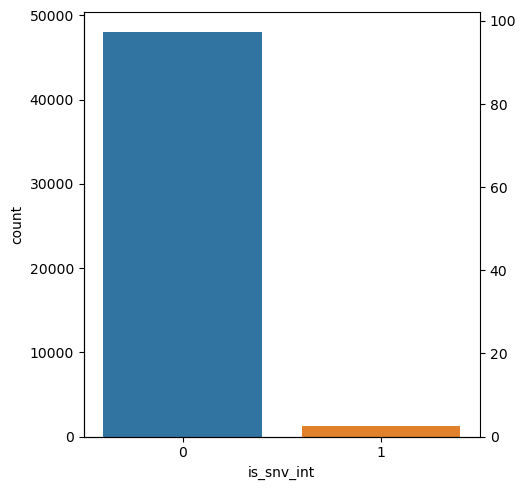

In [150]:
# class label imbalance in train
g = sns.catplot(x="is_snv_int", kind="count", data=df)
total_samples = len(df)
for i, ax in enumerate(g.axes.flat):
    ymin, ymax = ax.get_ylim()        
    ax1 = ax.twinx()
    
    # scale right axis labels to total samples and mutliply with 100 for percentages
    ax1.set_ylim(100*ymin/total_samples, 100*ymax/total_samples)
print(df['is_snv_int'].value_counts(normalize=True) * 100)

##### Feature correlations

In [41]:
le = LabelEncoder()
df_heatmap = pd.DataFrame(columns=feature_cols)
for feature in feature_cols:
    if df[feature].dtype == 'object':
        print(feature)
        le.fit(df[feature])
        df_heatmap[feature] = le.transform(df[feature])
    else:
        df_heatmap[feature] = df[feature]

REF
Chr


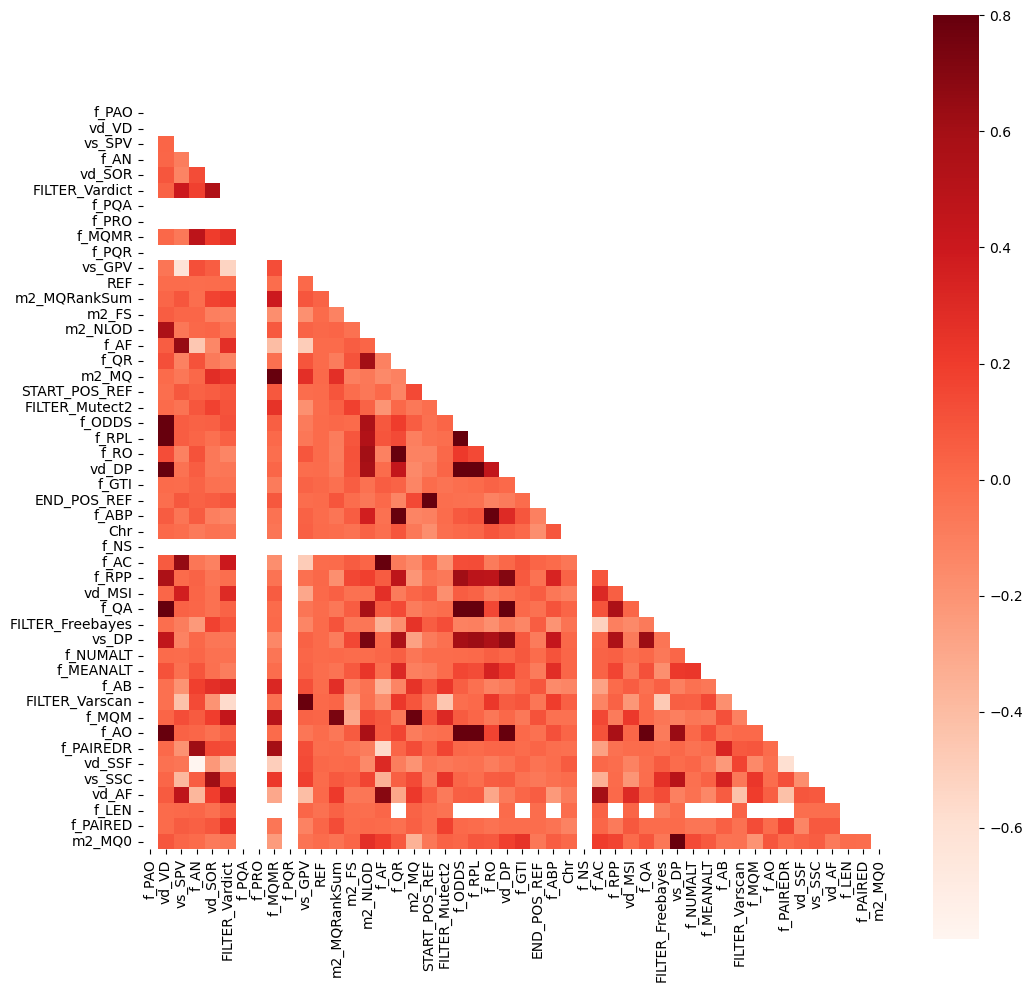

In [123]:
fig = plt.subplots(figsize=(12,12))
# df_heatmap = df.drop(['Chr'], inplace=True)
cor = df_heatmap.corr()
matrix = np.triu(cor)
sns.heatmap(cor, vmax=.8, square=True, cmap=plt.cm.Reds, annot=True, annot_kws={"fontsize":6}, mask=matrix)
plt.show()

In [144]:
s = cor.unstack()
so = s.sort_values()
so = so[abs(so) != 1]
print(so.iloc[:2])
print(so.iloc[-537:-485])
#comment out to reduce output
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # print(so.iloc[:-485])


f_AN    vd_SSF   -0.792464
vd_SSF  f_AN     -0.792464
dtype: float64
m2_MQRankSum    f_MQM             0.735078
f_MQM           m2_MQRankSum      0.735078
vs_DP           m2_NLOD           0.737127
m2_NLOD         vs_DP             0.737127
f_MQM           m2_MQ             0.786570
m2_MQ           f_MQM             0.786570
vs_DP           m2_MQ0            0.788862
m2_MQ0          vs_DP             0.788862
vs_GPV          FILTER_Varscan    0.792546
FILTER_Varscan  vs_GPV            0.792546
vd_VD           vd_DP             0.868634
vd_DP           vd_VD             0.868634
f_RO            f_ABP             0.870282
f_ABP           f_RO              0.870282
                f_QR              0.876030
f_QR            f_ABP             0.876030
f_MQMR          m2_MQ             0.899907
m2_MQ           f_MQMR            0.899907
f_AC            f_AF              0.904468
f_AF            f_AC              0.904468
vd_DP           f_RPL             0.905707
f_RPL           vd_DP       

<Axes: xlabel='f_QA', ylabel='f_AO'>

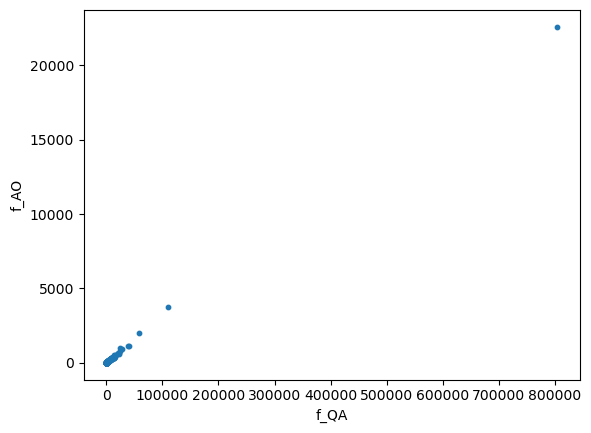

In [158]:
df.plot.scatter(x = 'f_QA', y = 'f_AO', s = 10)


##### START_POS_REF

In [43]:
print(df["START_POS_REF"].min())
print(df["START_POS_REF"].max())

3
249240478


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/409207852.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/409207852.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)


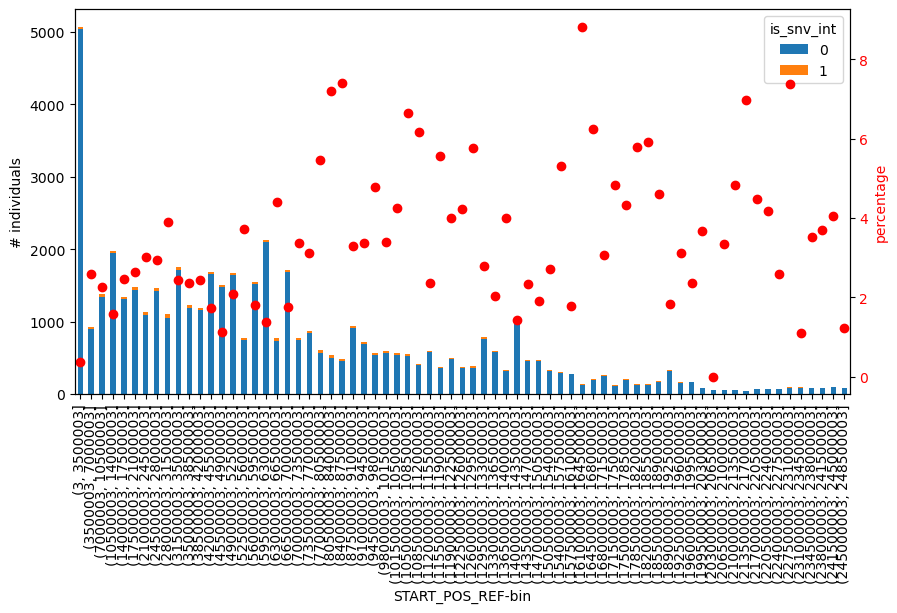

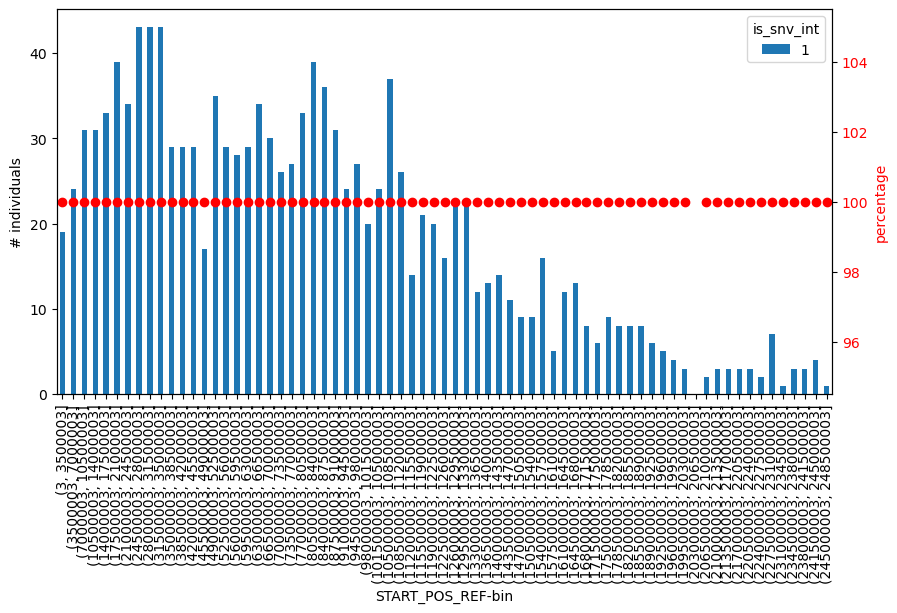

In [44]:
bins = np.arange(df["START_POS_REF"].min(), df["START_POS_REF"].max(), 3500000)
df["START_POS_REF-bin"] = pd.cut(df["START_POS_REF"], bins=bins, include_lowest=False)

df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

########### Only 1's values ######
bins = np.arange(df["START_POS_REF"].min(), df["START_POS_REF"].max(), 3500000)
df["START_POS_REF-bin"] = pd.cut(df["START_POS_REF"], bins=bins, include_lowest=False)

df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['START_POS_REF-bin'], axis=1, inplace=True)

##### Mutect2

m2_MQ

In [45]:
print(df["m2_MQ"].min())
print(df["m2_MQ"].max())

10.13
62.65


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3817907202.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQ-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ-bin', values=0).sort_index(ascending=False, axis=1)


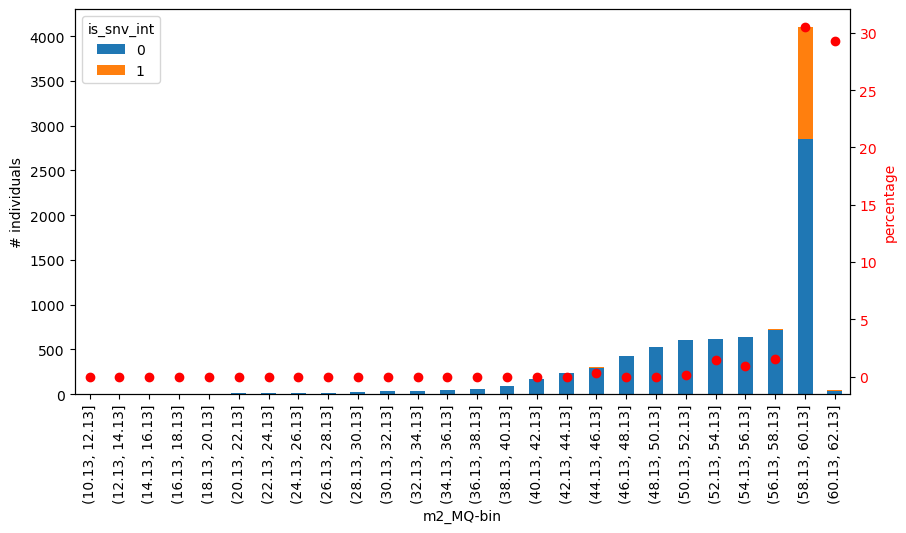

In [46]:
bins = np.arange(df["m2_MQ"].min(), df["m2_MQ"].max(), 2)
df["m2_MQ-bin"] = pd.cut(df["m2_MQ"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQ-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_MQ-bin'], axis=1, inplace=True)

m2_FS

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/2386091602.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_FS-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_FS-bin', values=0).sort_index(ascending=False, axis=1)


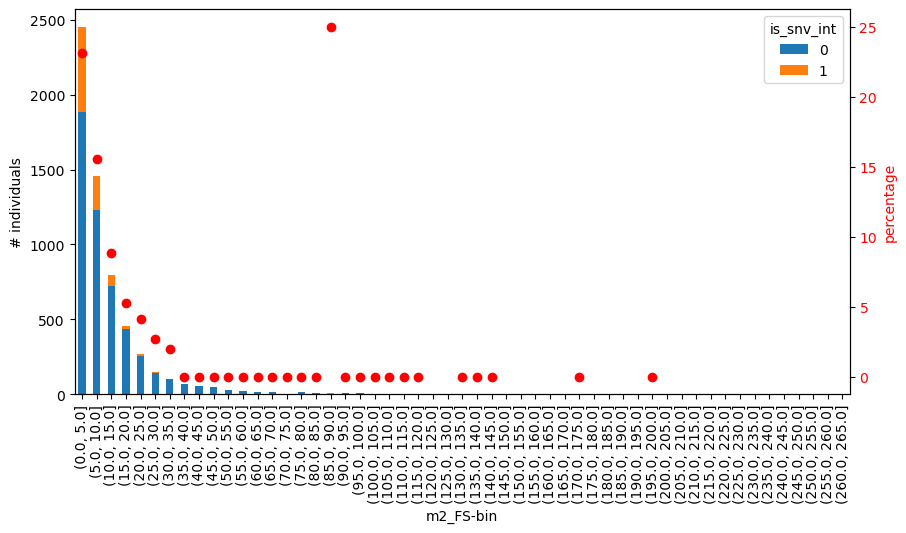

In [47]:
bins = np.arange(df["m2_FS"].min(), df["m2_FS"].max(), 5)
df["m2_FS-bin"] = pd.cut(df["m2_FS"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_FS-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_FS-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_FS-bin'], axis=1, inplace=True)

m2_MQ0

In [48]:
print(df["m2_MQ0"].min())
print(df["m2_MQ0"].max())

0.0
8213.0


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/4183636874.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/4183636874.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)


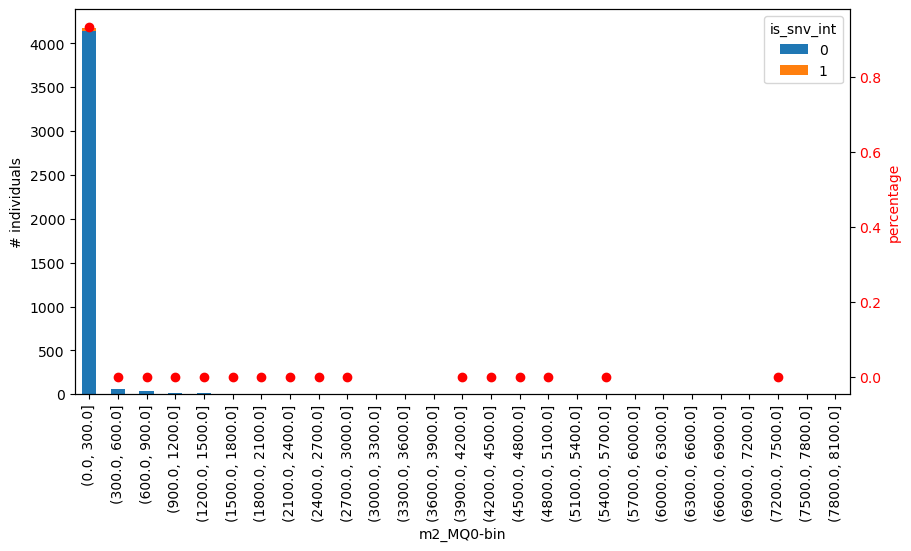

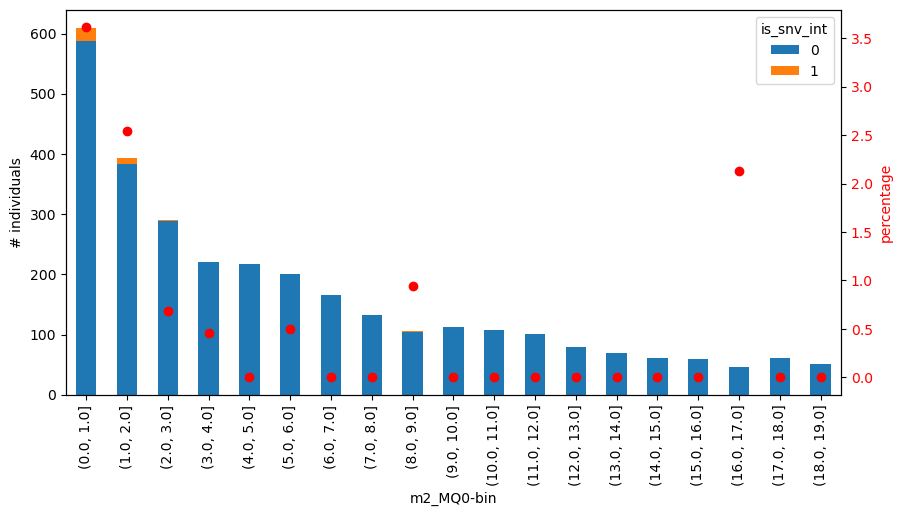

In [49]:
bins = np.arange(df["m2_MQ0"].min(), df["m2_MQ0"].max(), 300)
df["m2_MQ0-bin"] = pd.cut(df["m2_MQ0"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

############## Zoom into smaller range ############
bins = np.arange(df["m2_MQ0"].min(), 20, 1)
df["m2_MQ0-bin"] = pd.cut(df["m2_MQ0"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_MQ0-bin'], axis=1, inplace=True)

m2_MQRankSum

In [50]:
print(df["m2_MQRankSum"].min())
print(df["m2_MQRankSum"].max())

-28.182
7.936


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/324342251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQRankSum-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQRankSum-bin', values=0).sort_index(ascending=False, axis=1)


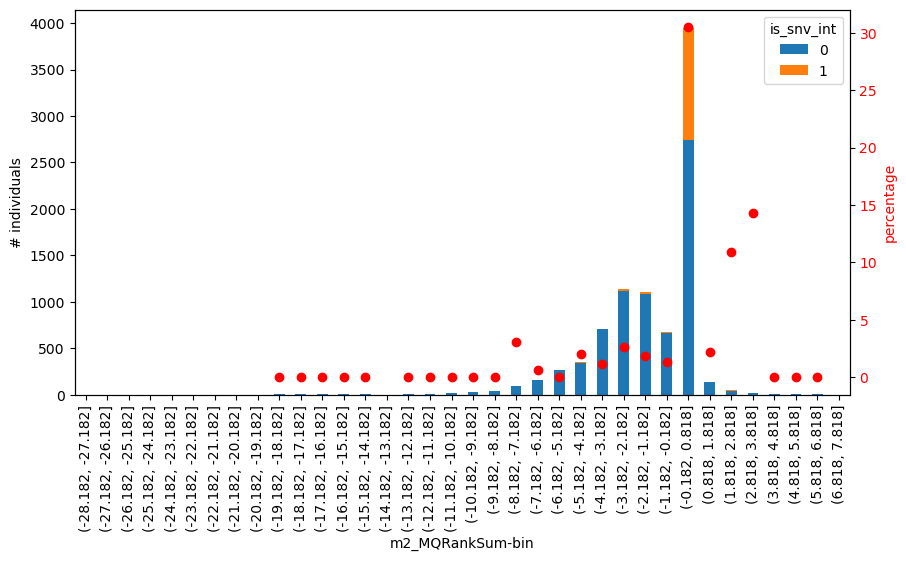

In [51]:
bins = np.arange(df["m2_MQRankSum"].min(), df["m2_MQRankSum"].max(), 1)
df["m2_MQRankSum-bin"] = pd.cut(df["m2_MQRankSum"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQRankSum-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQRankSum-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_MQRankSum-bin'], axis=1, inplace=True)

m2_NLOD

In [52]:
print(df["m2_NLOD"].min())
print(df["m2_NLOD"].max())

0.507
2283.25


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3538675892.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3538675892.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)


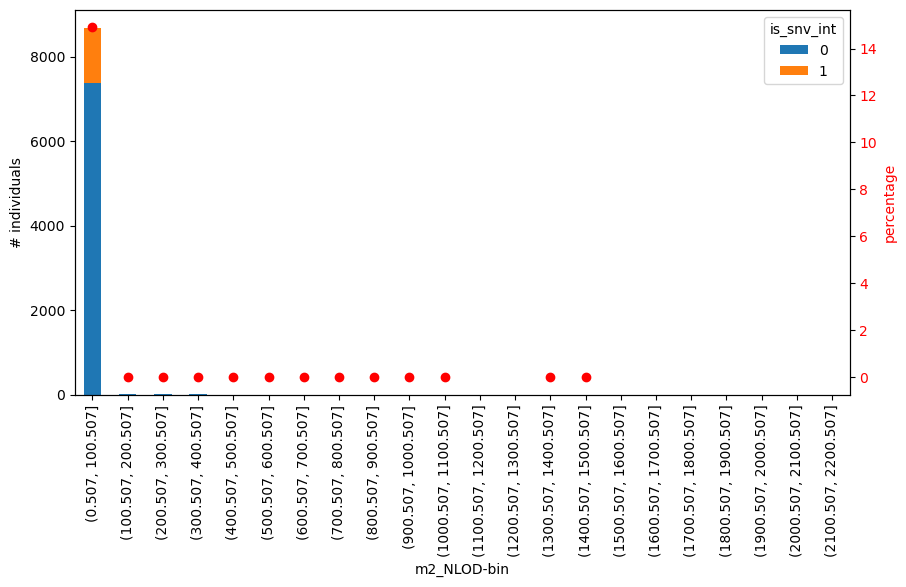

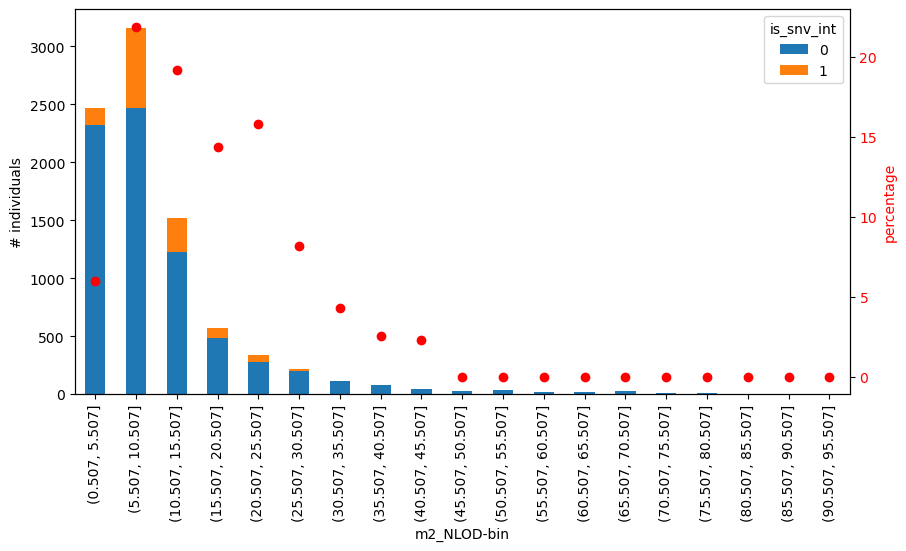

In [53]:
bins = np.arange(df["m2_NLOD"].min(), df["m2_NLOD"].max(), 100)
df["m2_NLOD-bin"] = pd.cut(df["m2_NLOD"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

################### Zoom into smaller range ##############
bins = np.arange(df["m2_NLOD"].min(), 100, 5)
df["m2_NLOD-bin"] = pd.cut(df["m2_NLOD"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_NLOD-bin'], axis=1, inplace=True)

##### FreeBayes

f_MQMR

In [54]:
df["f_MQMR"].min()

0.0

In [55]:
df["f_MQMR"].max()

70.0

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1968242763.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['f_MQMR-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQMR-bin', values=0).sort_index(ascending=False, axis=1)


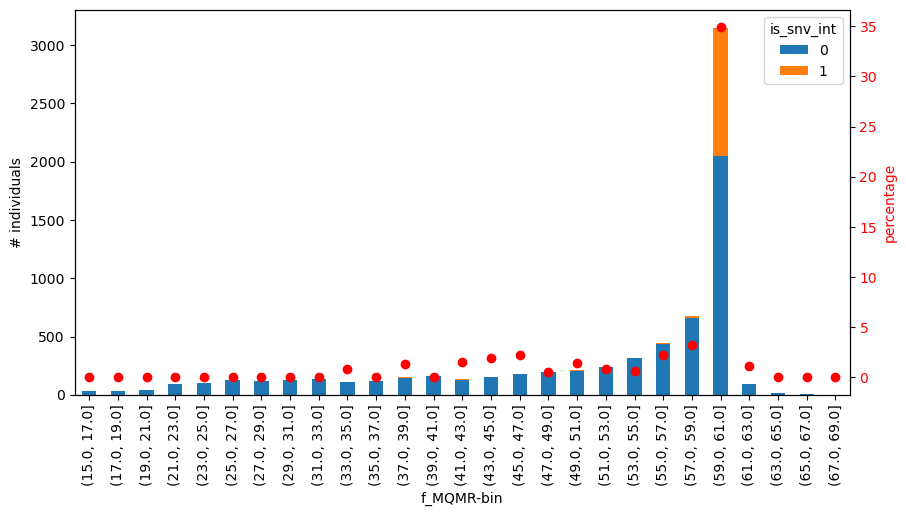

In [56]:
bins = np.arange(15, df["f_MQMR"].max(), 2)
df["f_MQMR-bin"] = pd.cut(df["f_MQMR"], bins=bins, include_lowest=False)

df_plot = df.groupby(['f_MQMR-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQMR-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['f_MQMR-bin'], axis=1, inplace=True)


f_MQM

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3280298838.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['f_MQM-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQM-bin', values=0).sort_index(ascending=False, axis=1)


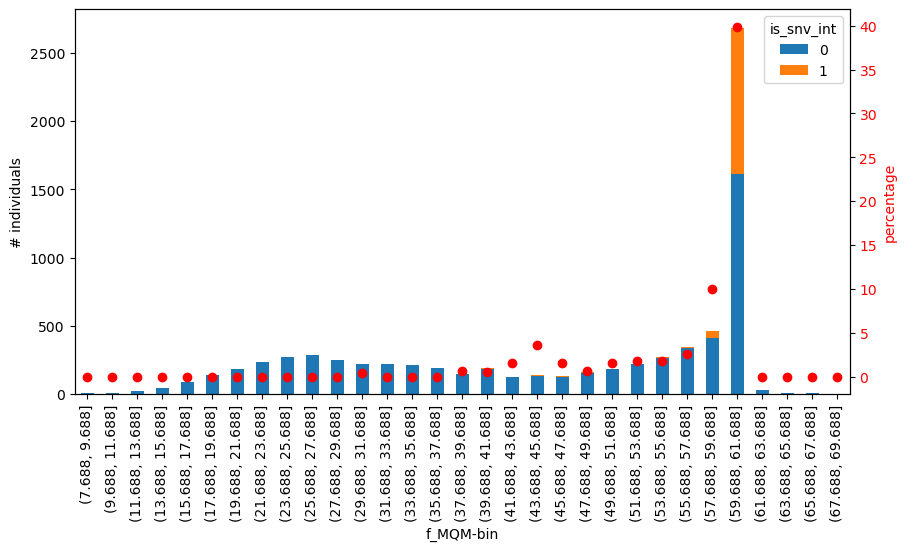

In [57]:
bins = np.arange( df["f_MQM"].min(), df["f_MQM"].max(), 2)
df["f_MQM-bin"] = pd.cut(df["f_MQM"], bins=bins, include_lowest=False)

df_plot = df.groupby(['f_MQM-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQM-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['f_MQM-bin'], axis=1, inplace=True)


f_MQMR


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AF


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_QR
f_ODDS


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_RPL
f_RO


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_GTI


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_ABP


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_RPP


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AC


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_QA


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_NUMALT


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_MEANALT


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AB


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_MQM


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AO
f_PAIREDR


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_LEN


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_PAIRED


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AN


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


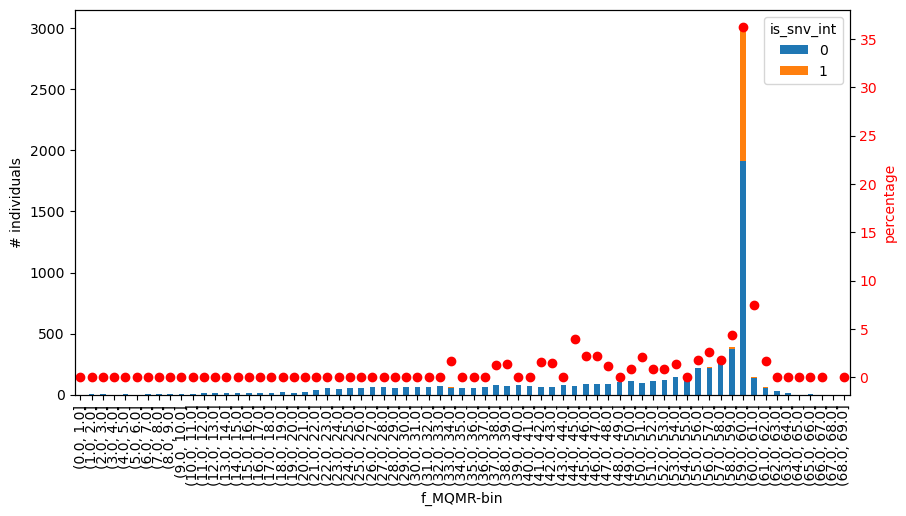

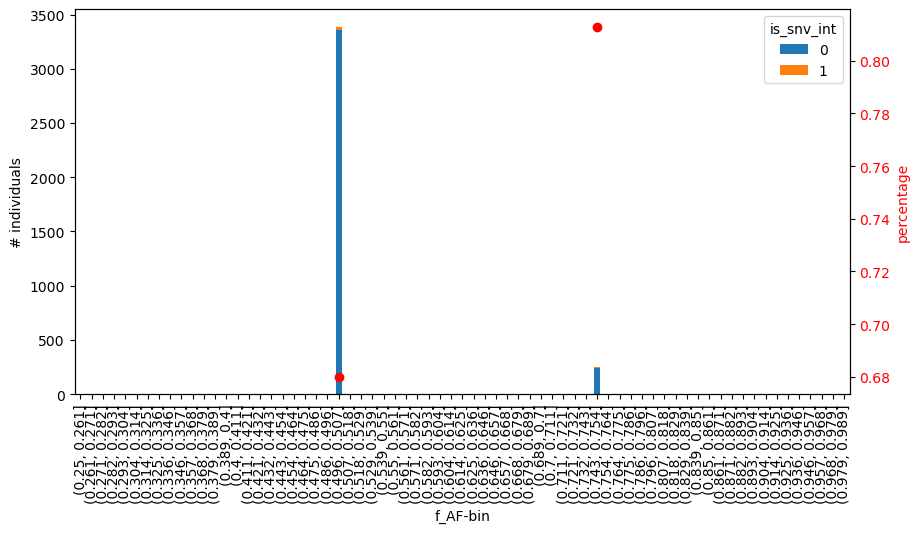

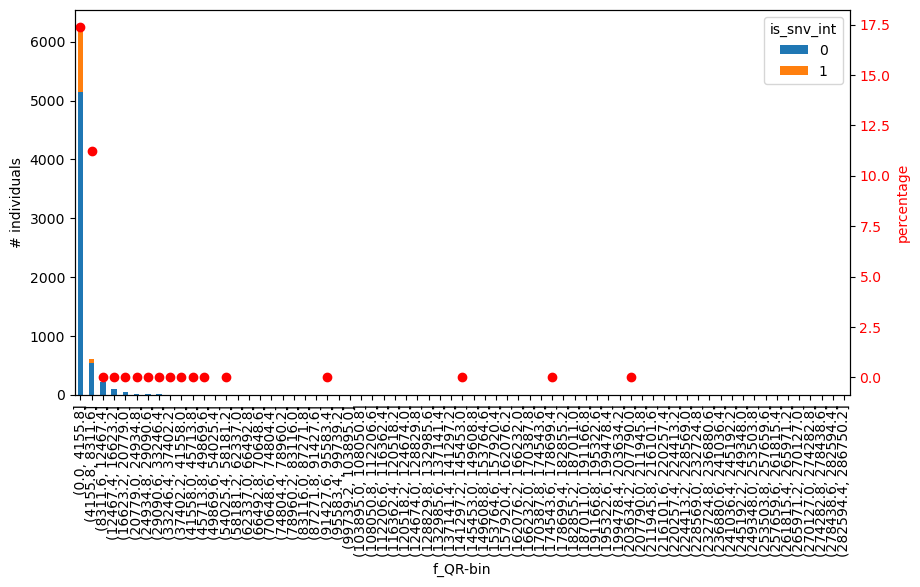

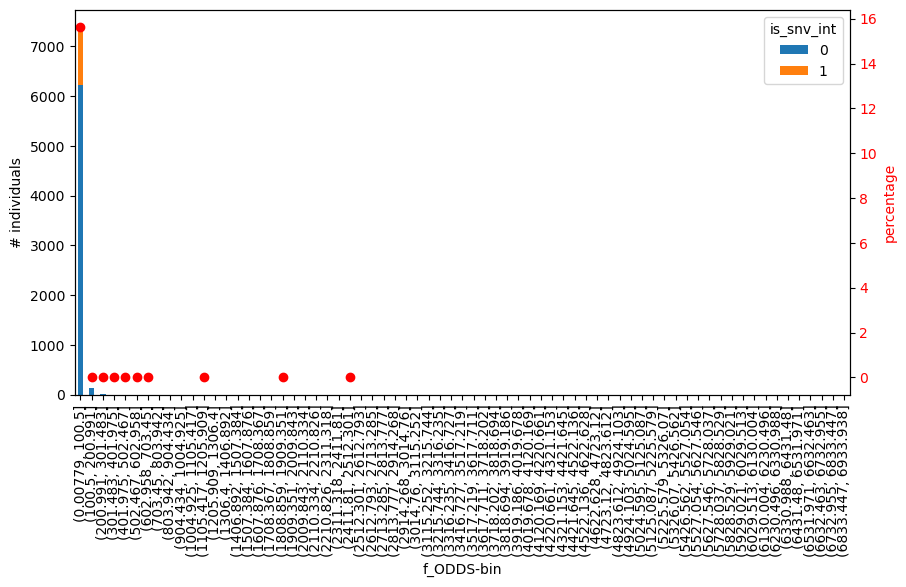

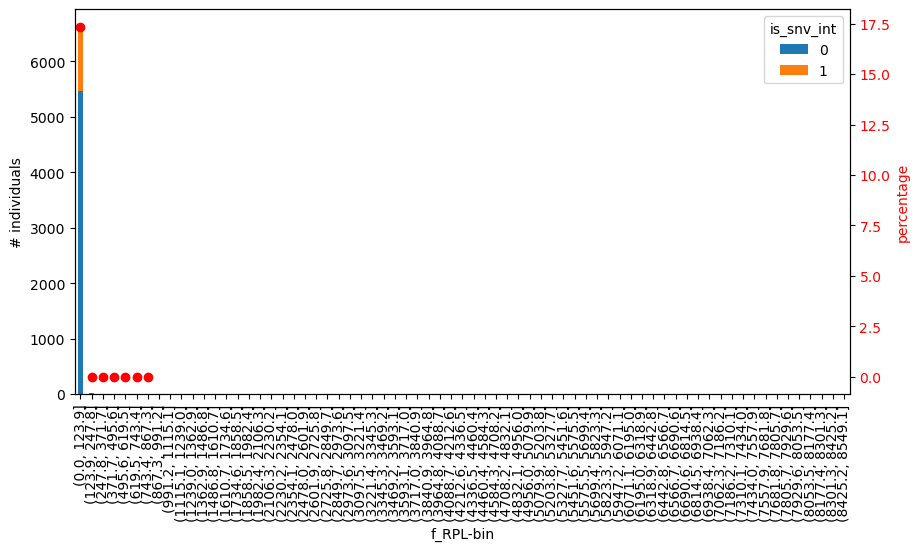

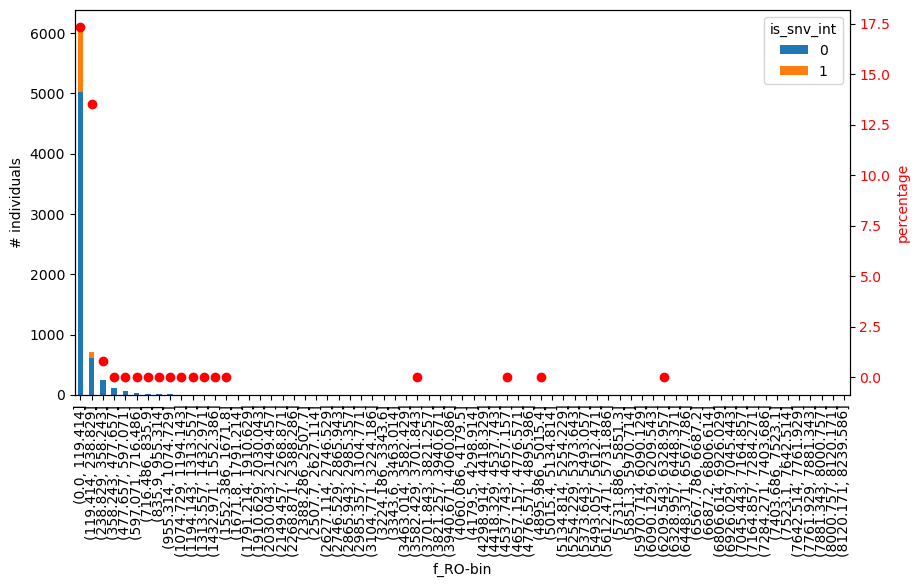

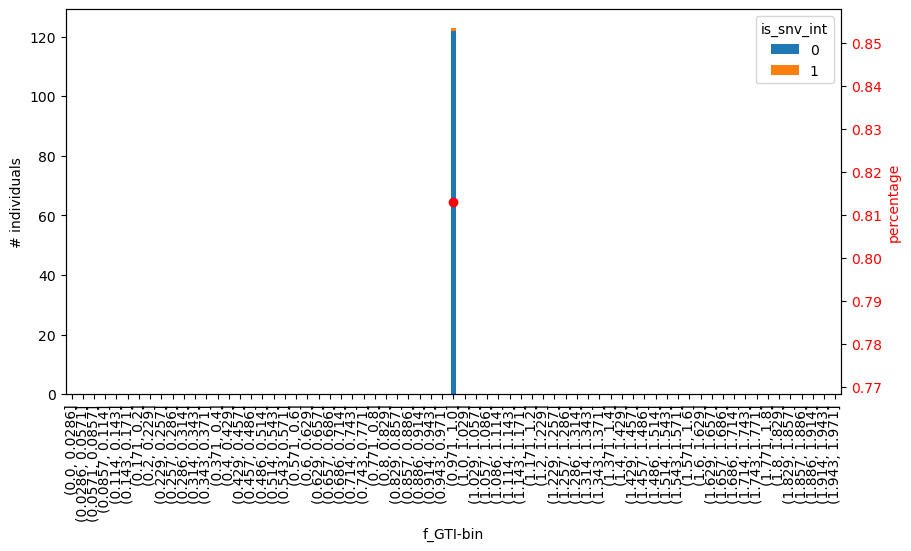

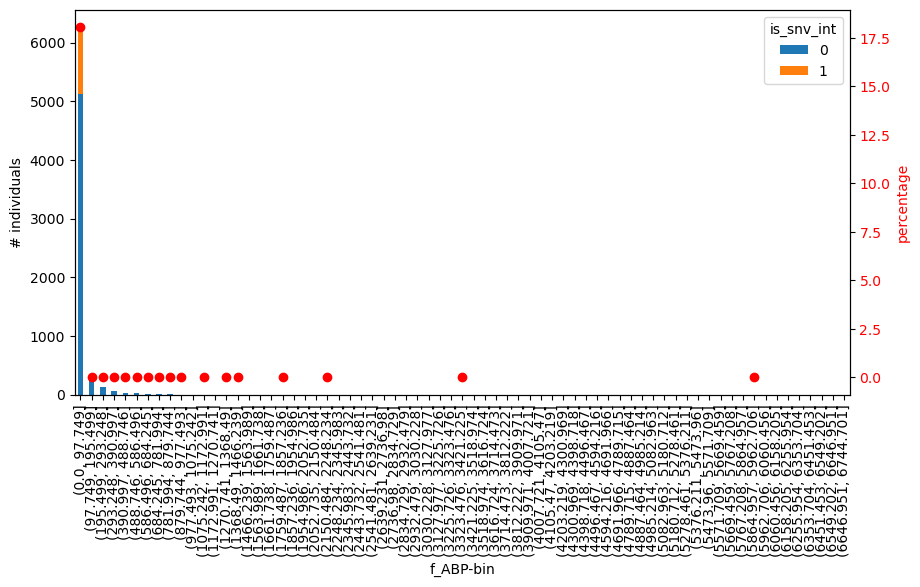

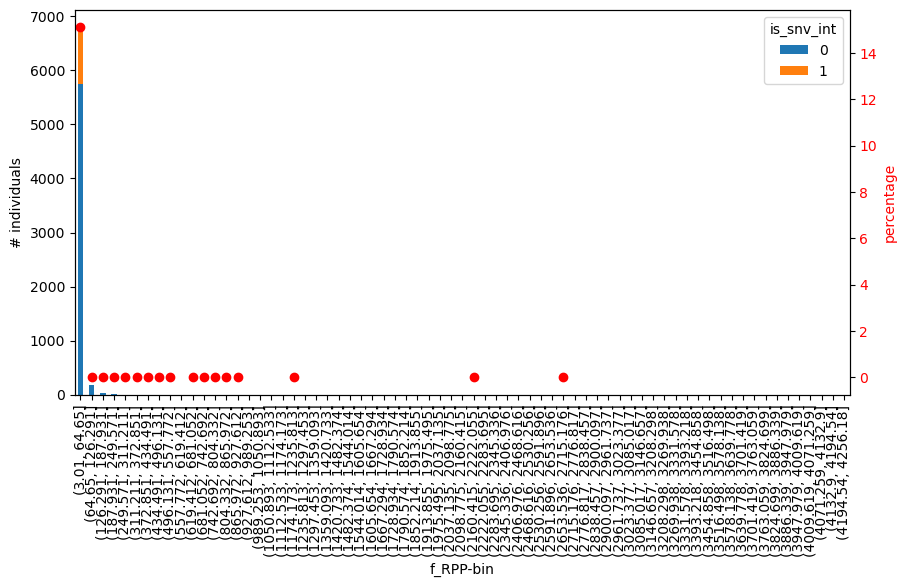

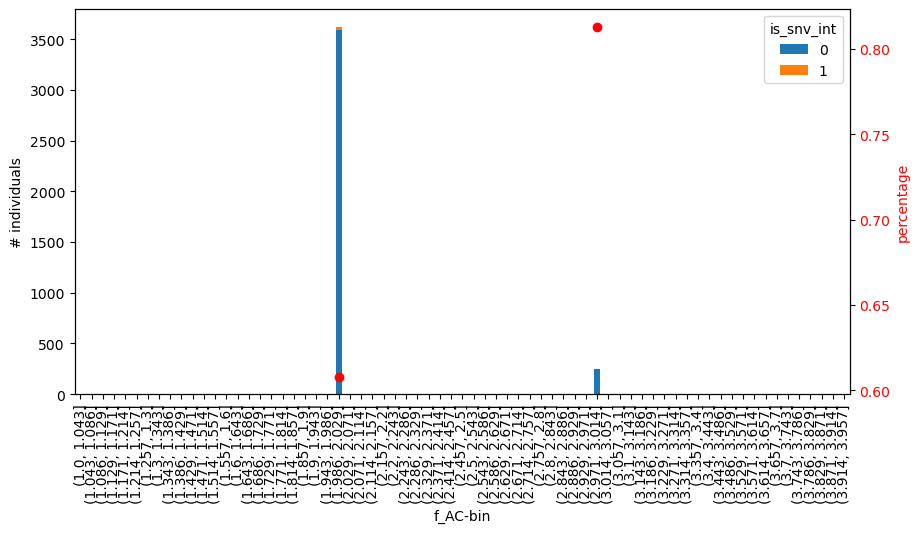

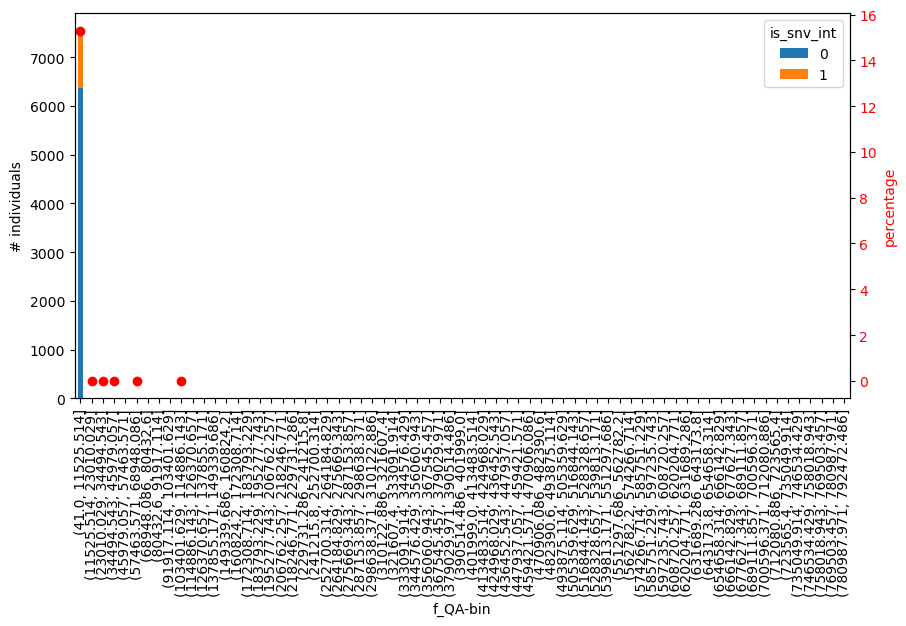

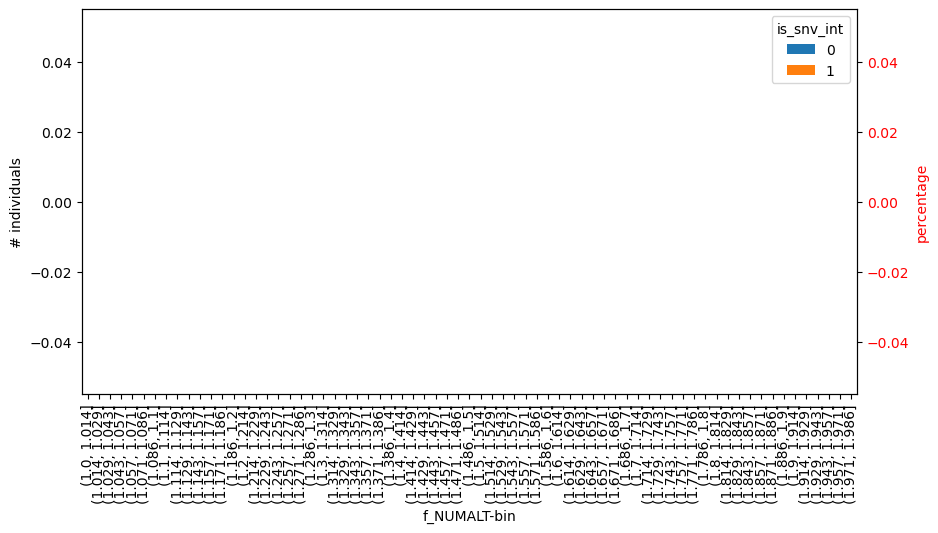

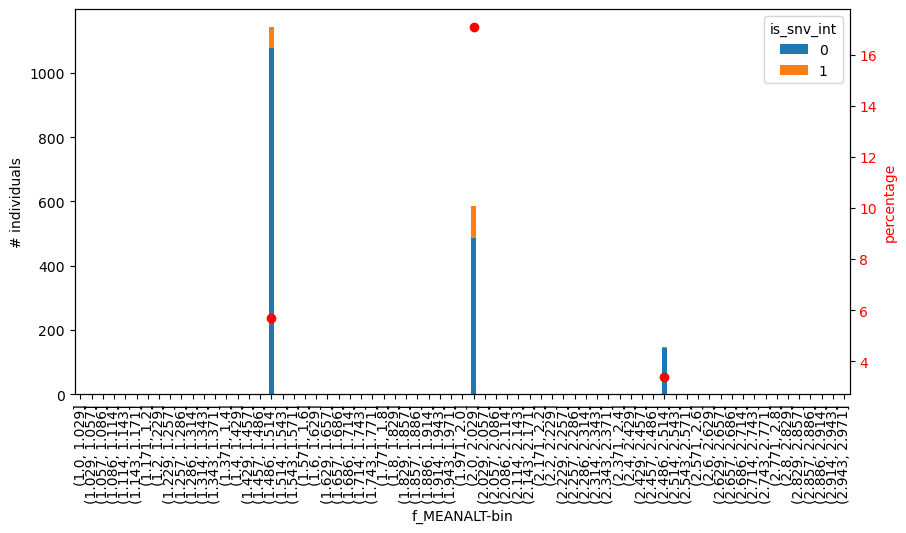

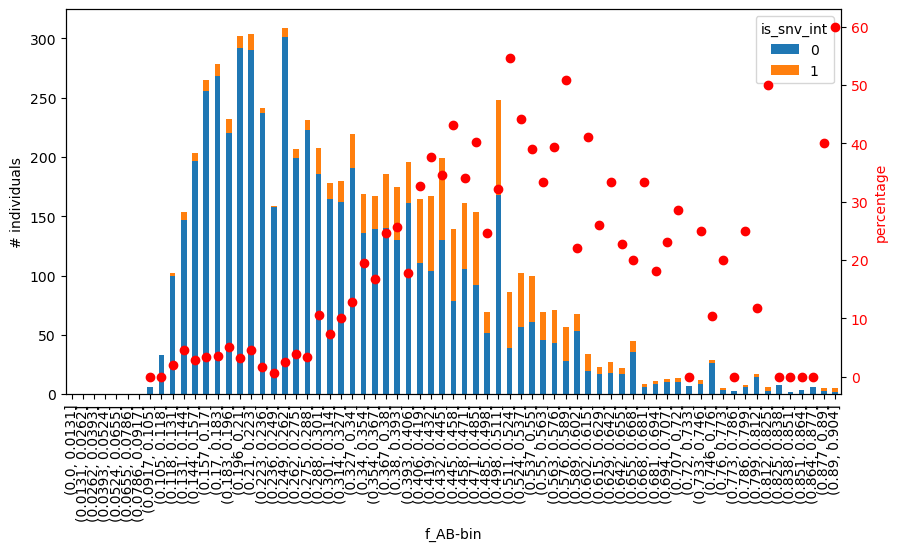

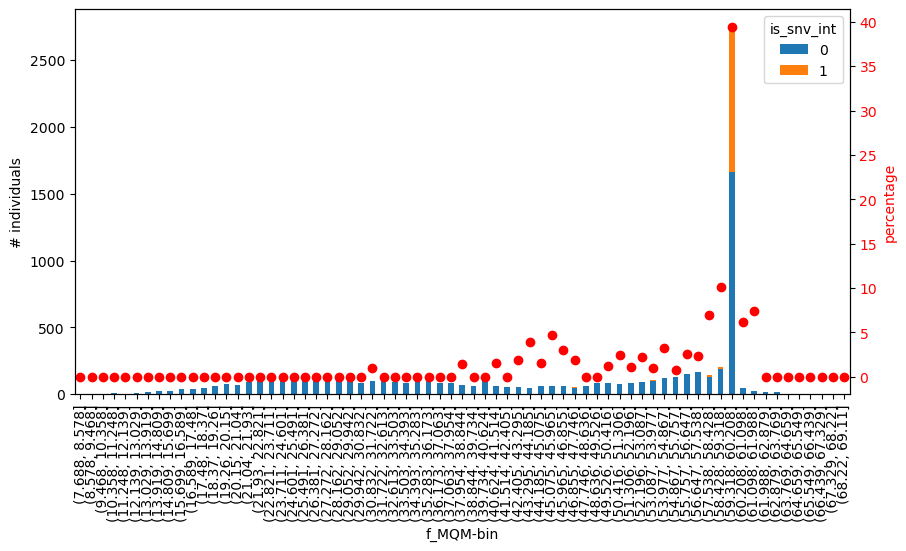

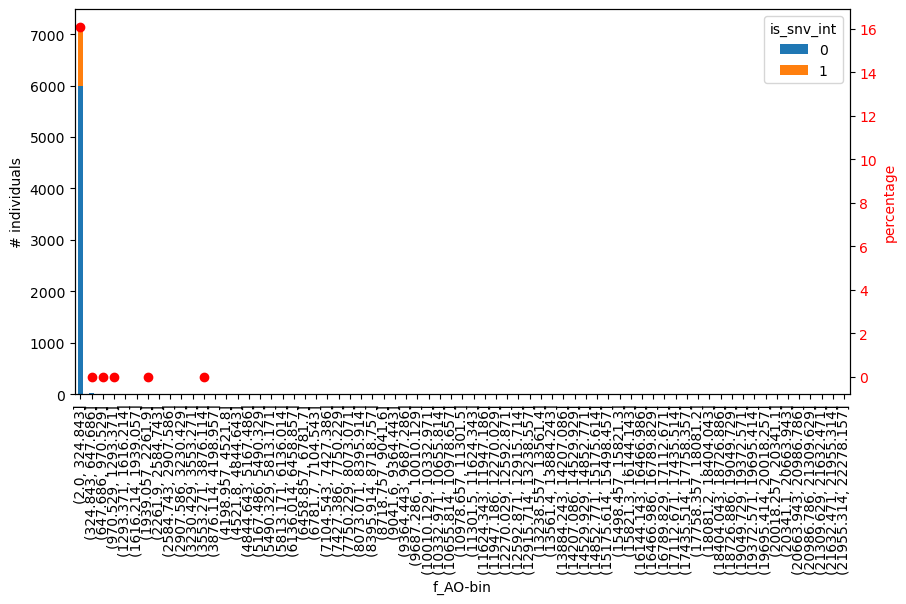

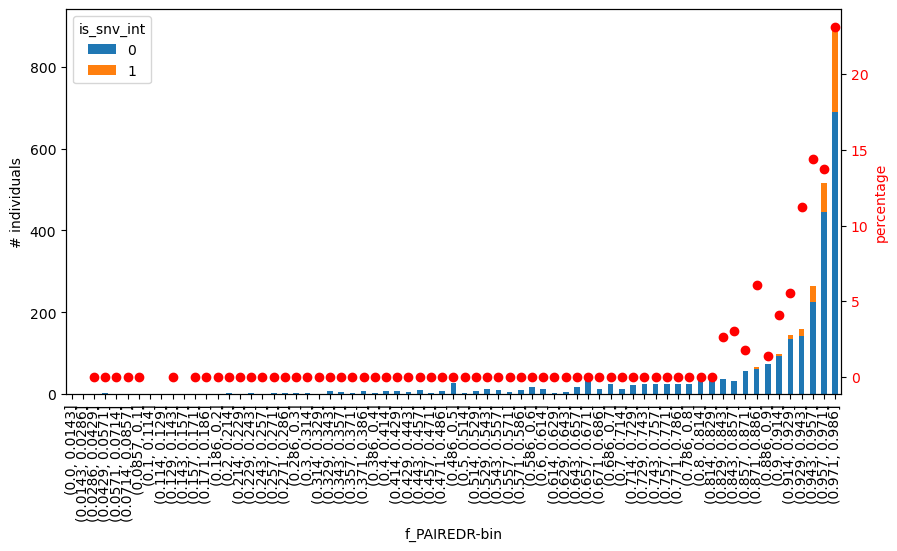

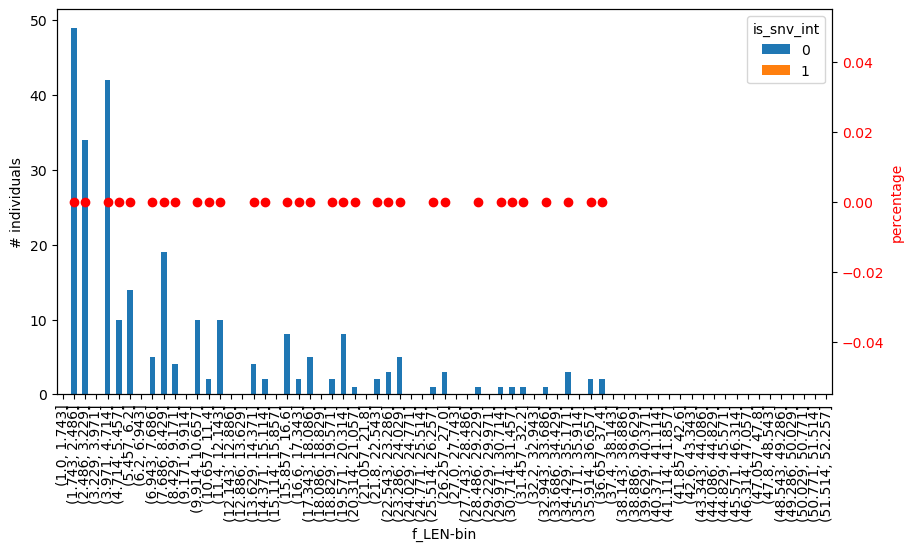

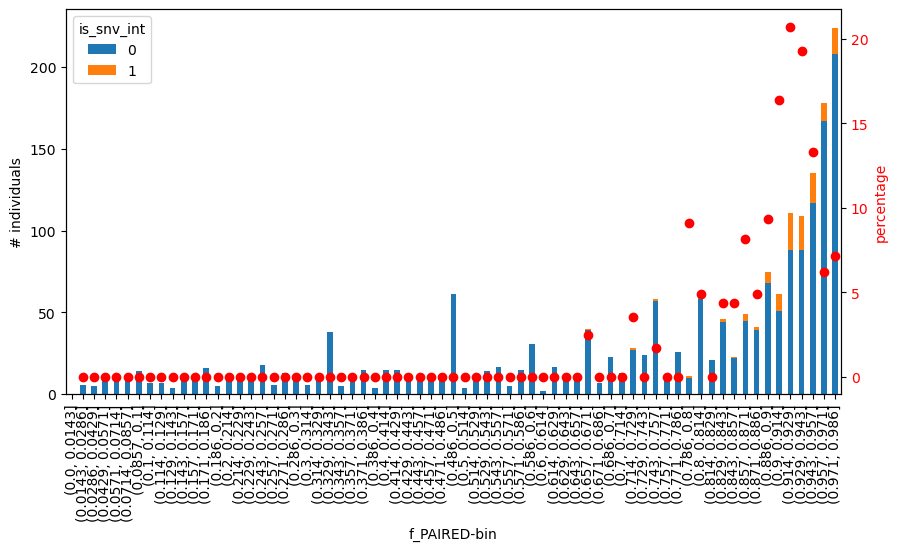

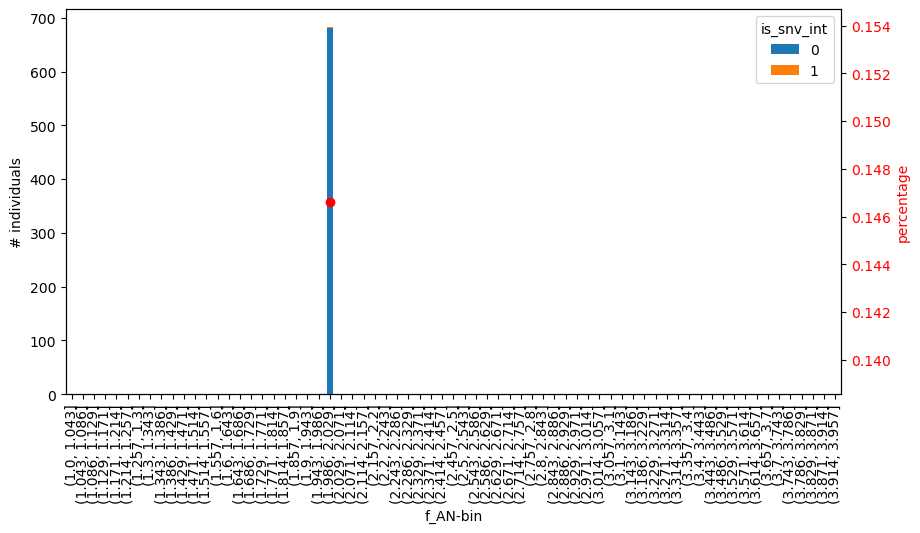

In [74]:

for f_feature in feature_cols:
       if not f_feature.startswith('f_'):
              continue
       print(f_feature)
       bins = np.arange( df[f_feature].min(), df[f_feature].max(), (df[f_feature].max() - df[f_feature].min())/70.0)
       df[f"{f_feature}-bin"] = pd.cut(df[f_feature], bins=bins, include_lowest=False)

       df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
       df_plot = df_plot[[0, 1]]

       fig, ax = plt.subplots(figsize=(10,5))
       df_plot.plot(kind='bar', stacked=True, ax=ax)
       ax.set_ylabel('# individuals')

       df_plot = df_plot.fillna(0)
       df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

       ax2 = ax.twinx()
       ax2.plot(df_plot[1].values, 'o', c='r')
       ax2.set_ylabel('percentage', color='r')
       ax2.tick_params(axis='y', labelcolor='r')

       df.drop([f'{f_feature}-bin'], axis=1, inplace=True)

##### Varscan

vs_SPV


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vs_GPV


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vs_DP
vs_SSC


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


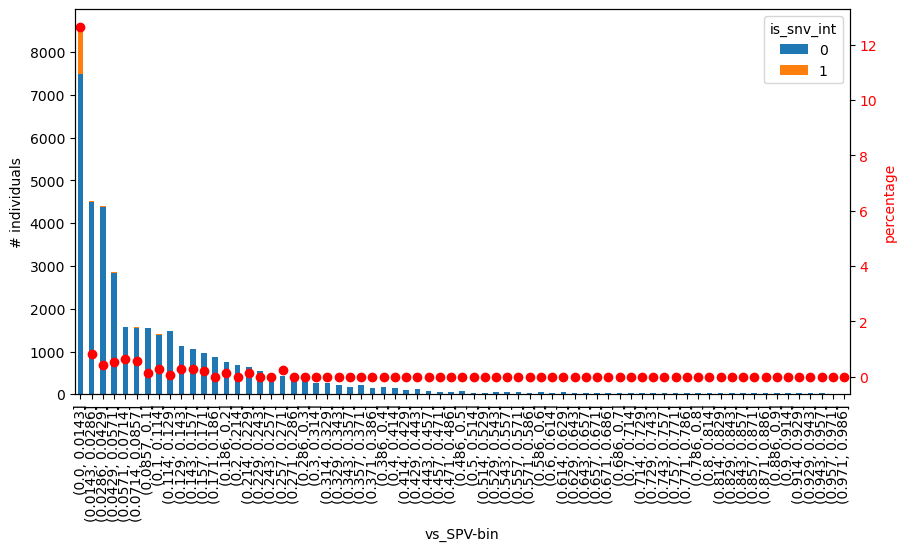

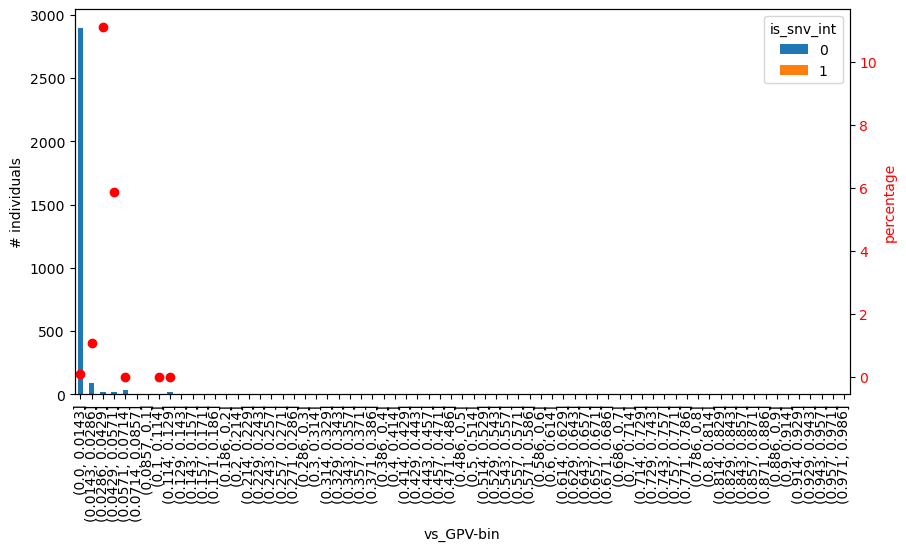

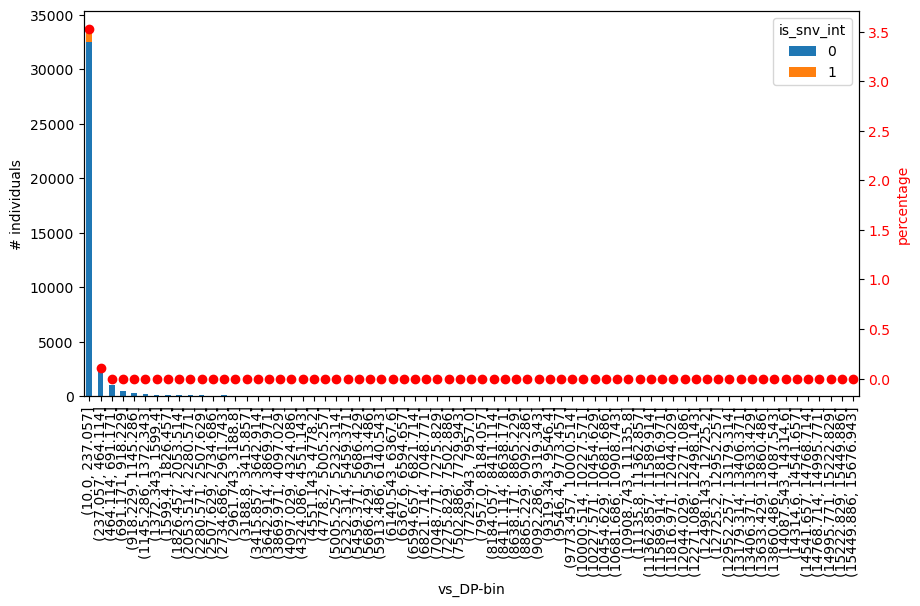

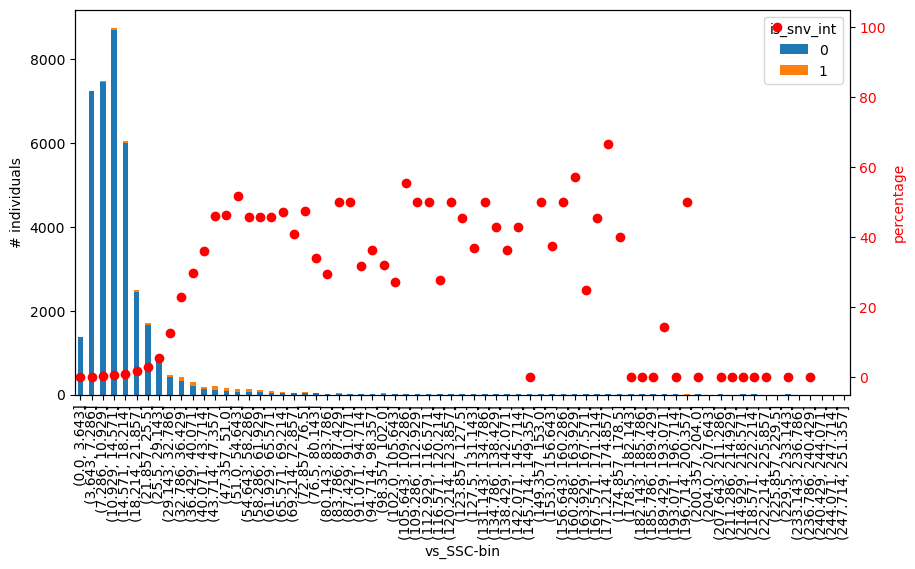

In [75]:
for f_feature in feature_cols:
       if not f_feature.startswith('vs_'):
              continue
       print(f_feature)
       bins = np.arange( df[f_feature].min(), df[f_feature].max(), (df[f_feature].max() - df[f_feature].min())/70.0)
       df[f"{f_feature}-bin"] = pd.cut(df[f_feature], bins=bins, include_lowest=False)

       df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
       df_plot = df_plot[[0, 1]]

       fig, ax = plt.subplots(figsize=(10,5))
       df_plot.plot(kind='bar', stacked=True, ax=ax)
       ax.set_ylabel('# individuals')

       df_plot = df_plot.fillna(0)
       df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

       ax2 = ax.twinx()
       ax2.plot(df_plot[1].values, 'o', c='r')
       ax2.set_ylabel('percentage', color='r')
       ax2.tick_params(axis='y', labelcolor='r')

       df.drop([f'{f_feature}-bin'], axis=1, inplace=True)

##### Vardict

vd_VD


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_SOR


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_DP


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_MSI


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_SSF


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_AF


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


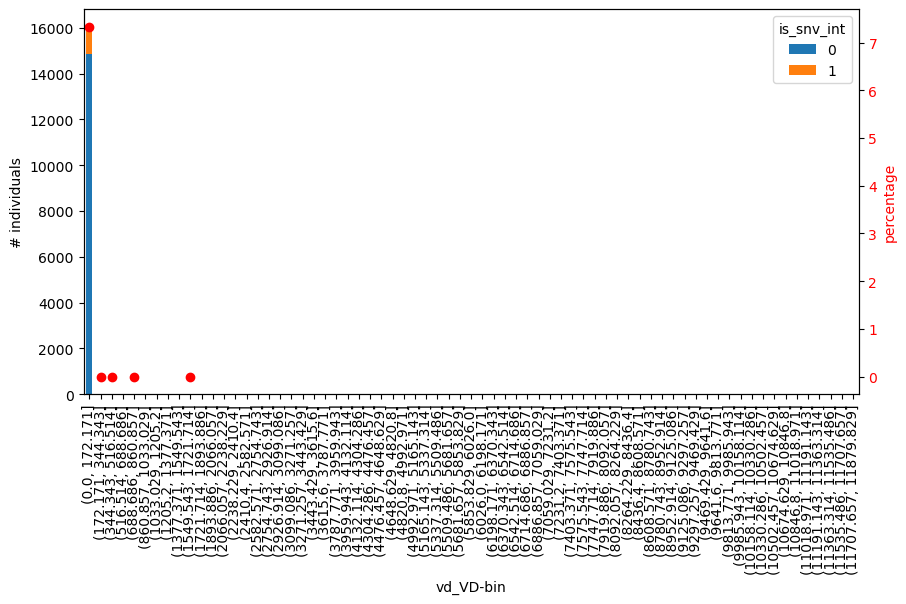

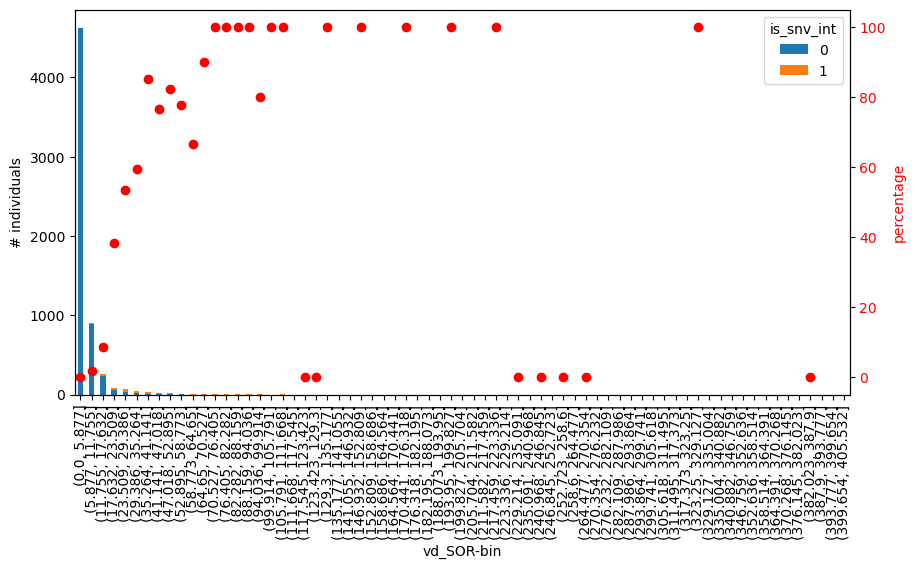

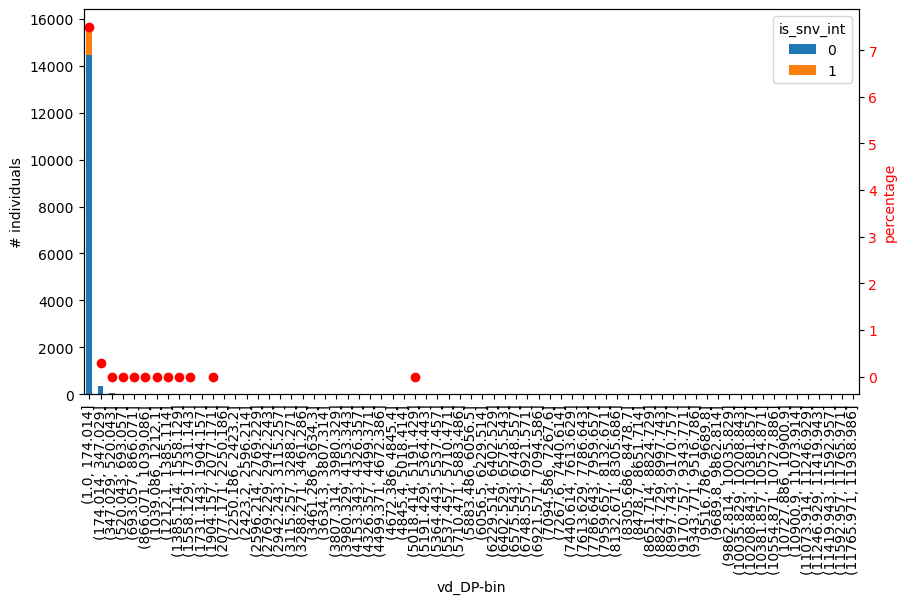

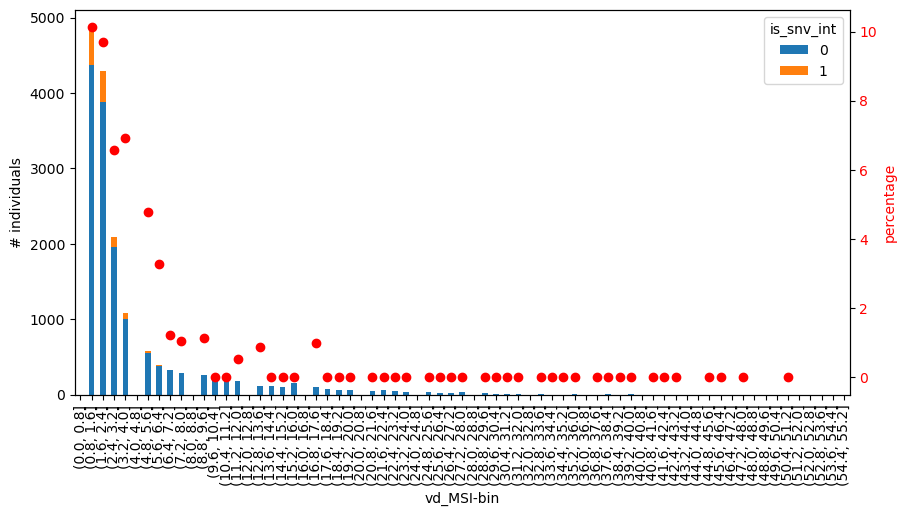

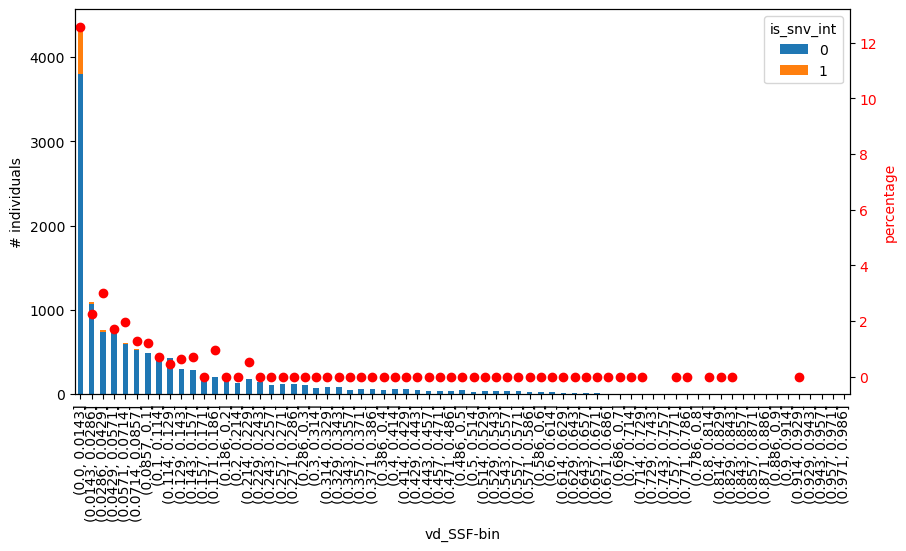

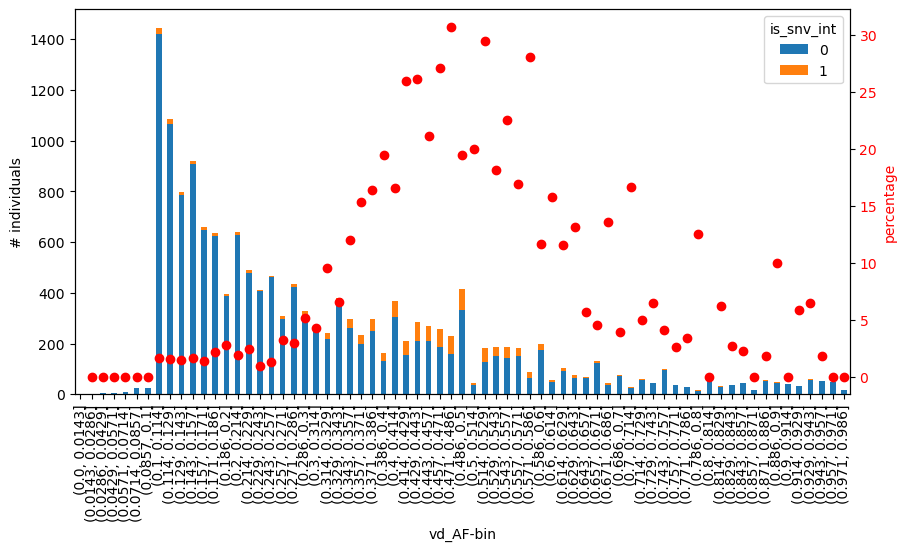

In [81]:
for f_feature in feature_cols:
       if not f_feature.startswith('vd_'):
              continue
       print(f_feature)
       bins = np.arange( df[f_feature].min(), df[f_feature].max(), (df[f_feature].max() - df[f_feature].min())/70.0)
       df[f"{f_feature}-bin"] = pd.cut(df[f_feature], bins=bins, include_lowest=False)

       df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
       df_plot = df_plot[[0, 1]]

       fig, ax = plt.subplots(figsize=(10,5))
       df_plot.plot(kind='bar', stacked=True, ax=ax)
       ax.set_ylabel('# individuals')

       df_plot = df_plot.fillna(0)
       df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

       ax2 = ax.twinx()
       ax2.plot(df_plot[1].values, 'o', c='r')
       ax2.set_ylabel('percentage', color='r')
       ax2.tick_params(axis='y', labelcolor='r')

       df.drop([f'{f_feature}-bin'], axis=1, inplace=True)

### Train and Test set distribution

In [83]:
feature_cols

['vd_VD',
 'vs_SPV',
 'vd_SOR',
 'FILTER_Vardict',
 'f_MQMR',
 'vs_GPV',
 'REF',
 'm2_NLOD',
 'm2_FS',
 'f_AF',
 'f_QR',
 'm2_MQRankSum',
 'm2_MQ',
 'START_POS_REF',
 'FILTER_Mutect2',
 'f_ODDS',
 'f_RPL',
 'f_RO',
 'vd_DP',
 'f_GTI',
 'END_POS_REF',
 'f_ABP',
 'Chr',
 'f_RPP',
 'f_AC',
 'vd_MSI',
 'f_QA',
 'FILTER_Freebayes',
 'vs_DP',
 'f_NUMALT',
 'f_MEANALT',
 'f_AB',
 'FILTER_Varscan',
 'f_MQM',
 'f_AO',
 'f_PAIREDR',
 'vd_SSF',
 'vs_SSC',
 'vd_AF',
 'f_LEN',
 'f_PAIRED',
 'm2_MQ0',
 'f_AN']

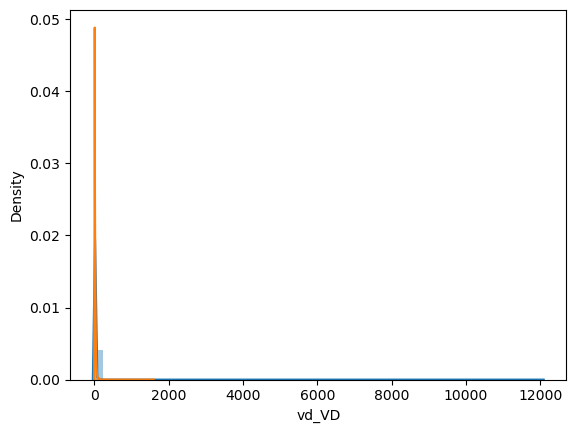

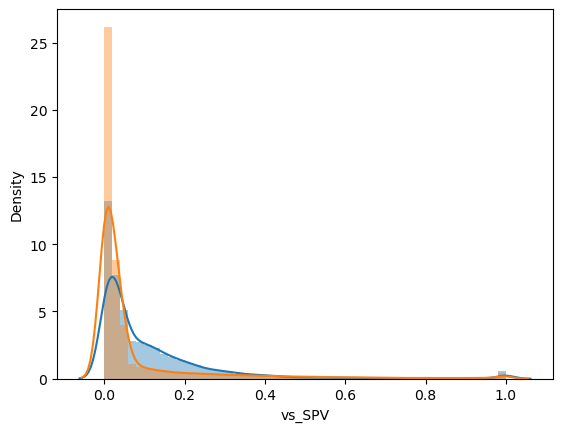

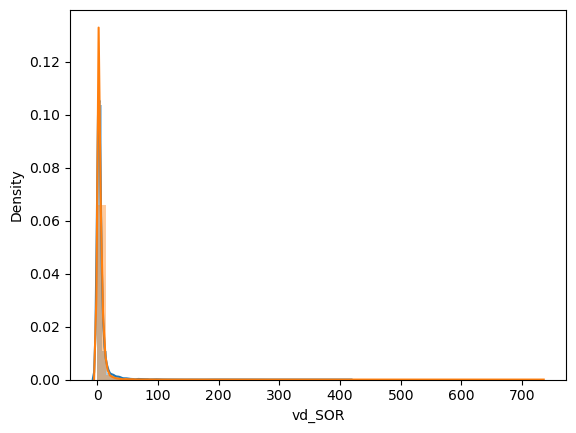

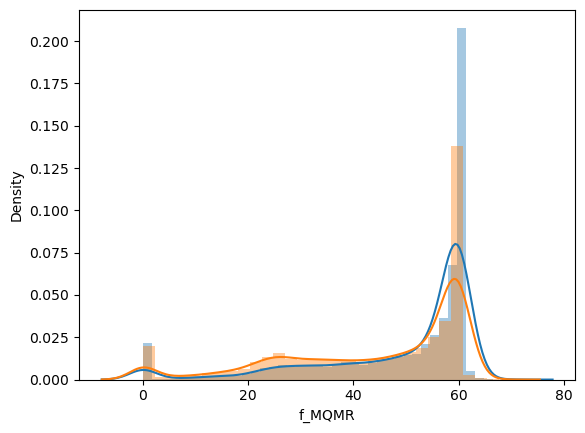

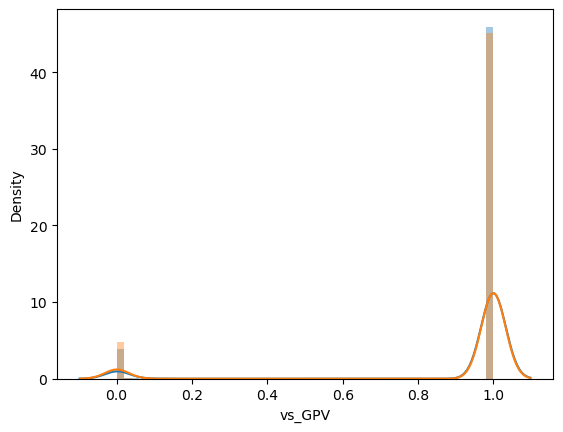

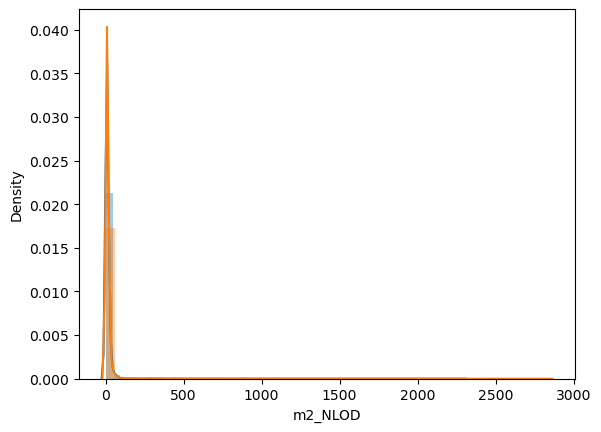

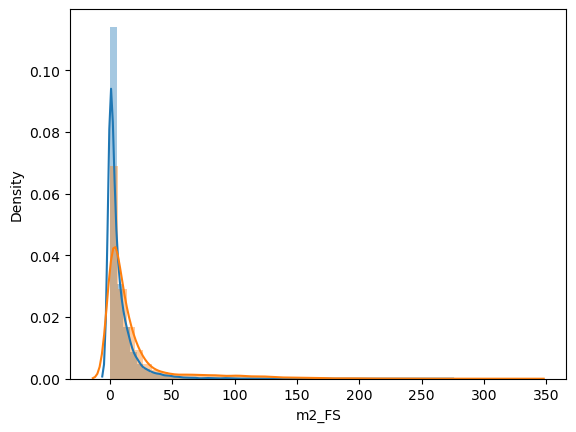

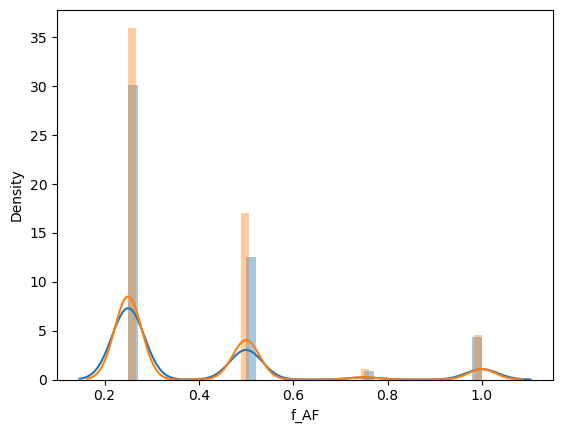

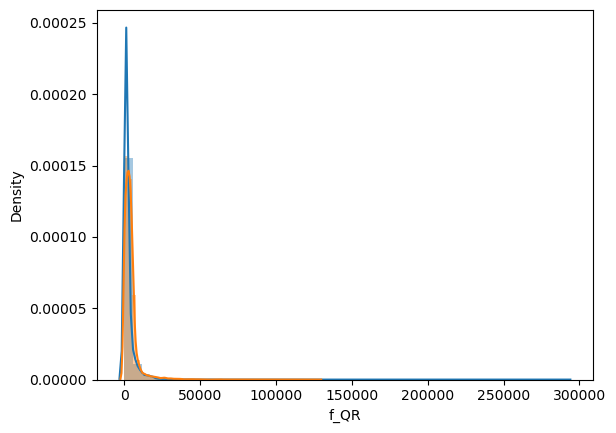

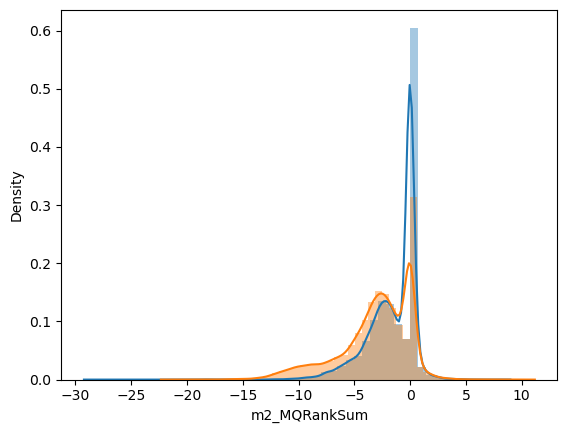

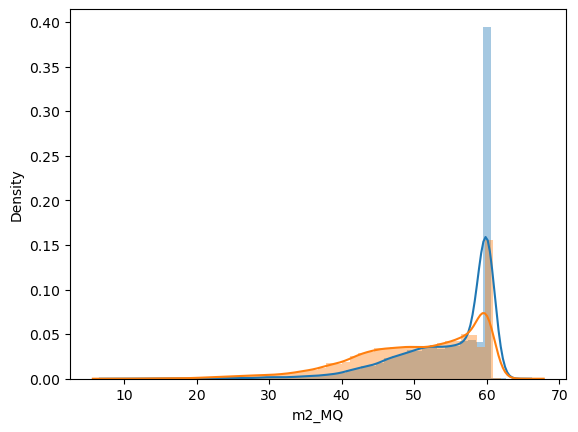

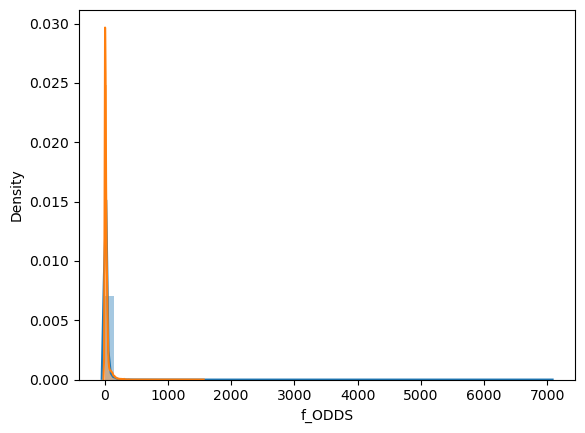

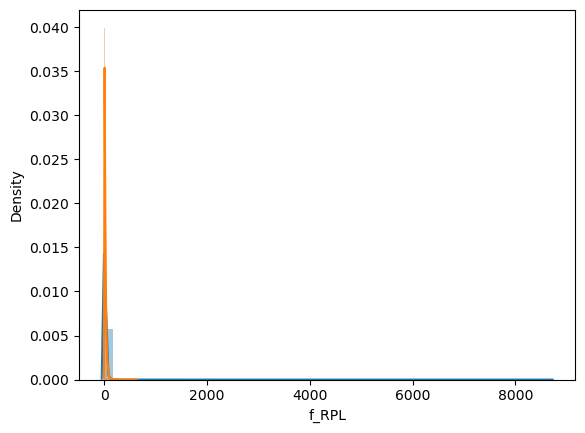

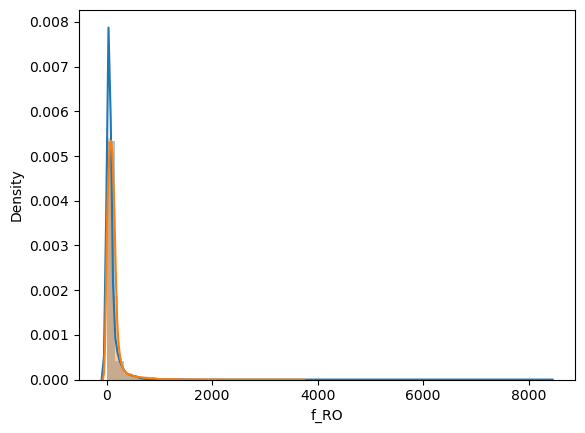

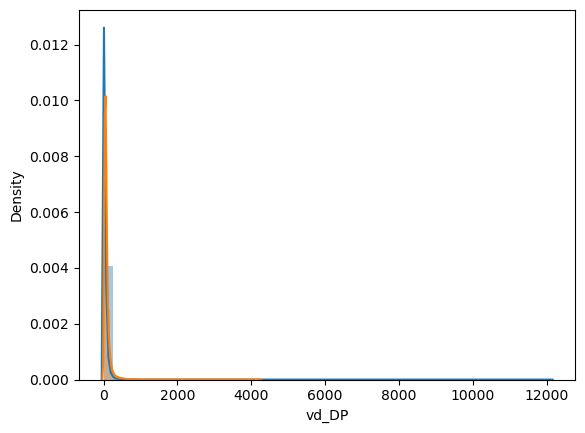

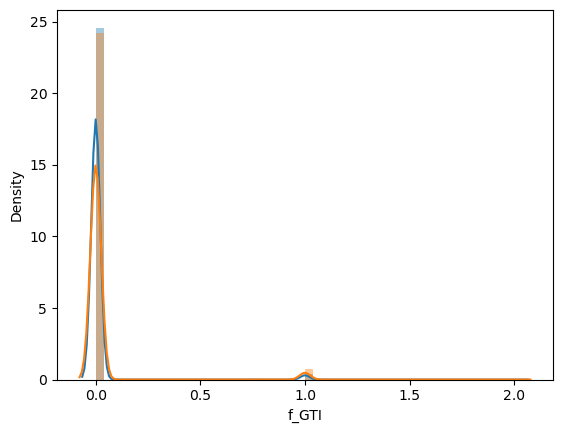

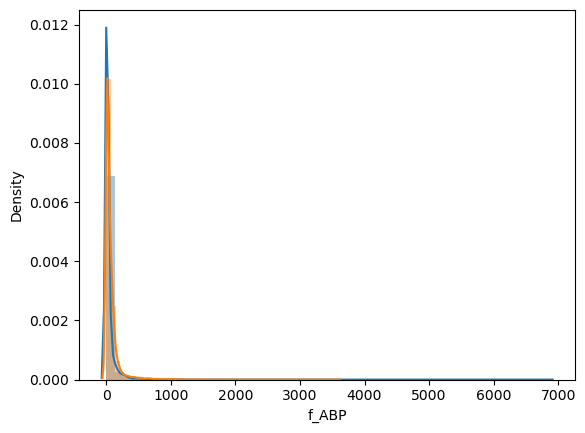

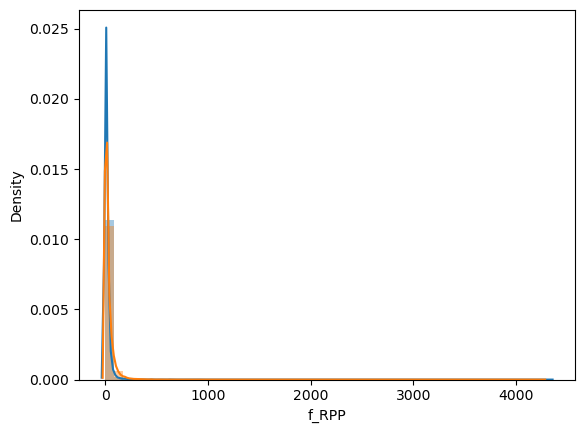

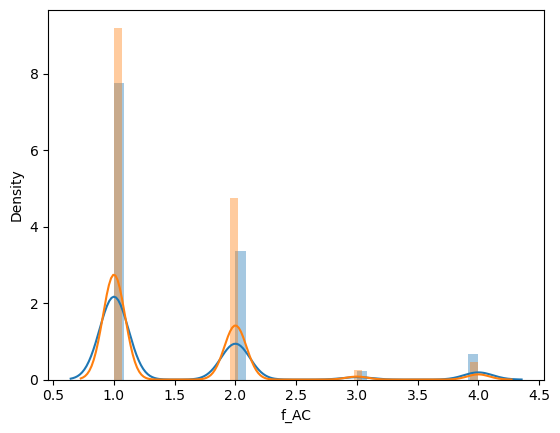

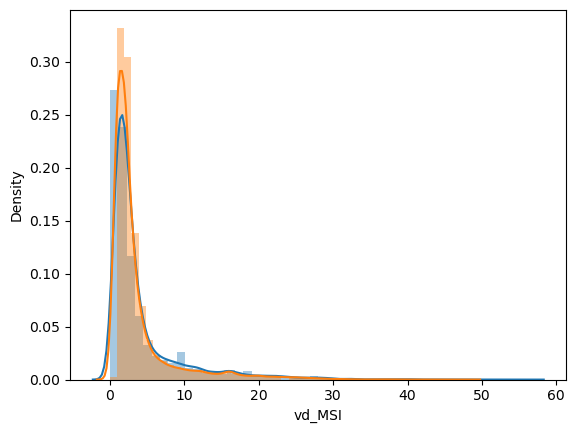

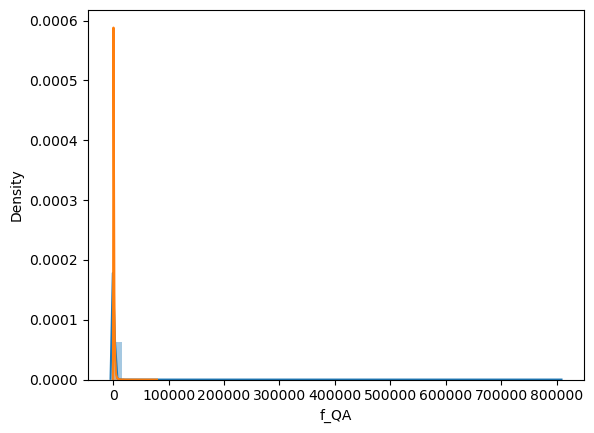

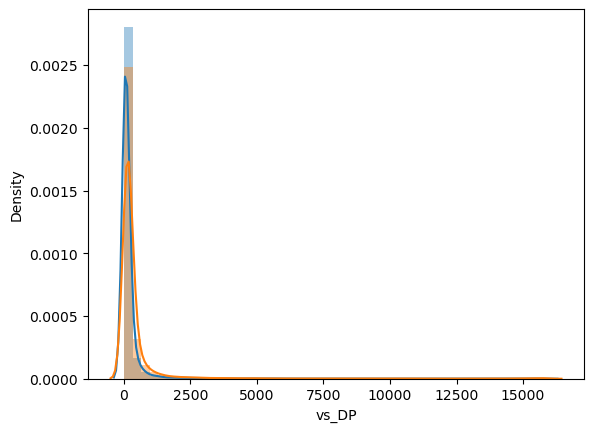

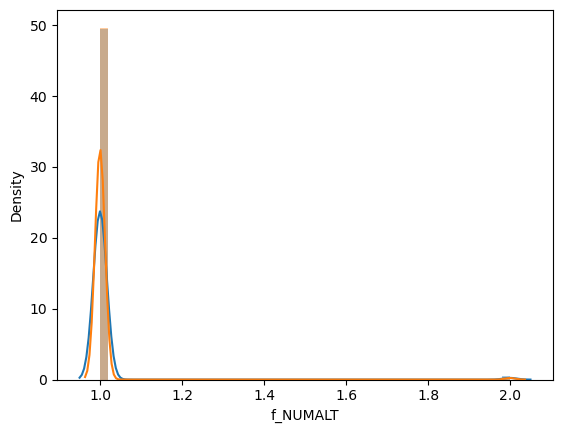

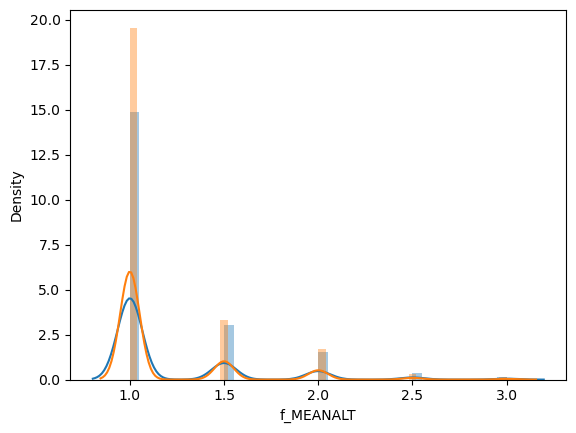

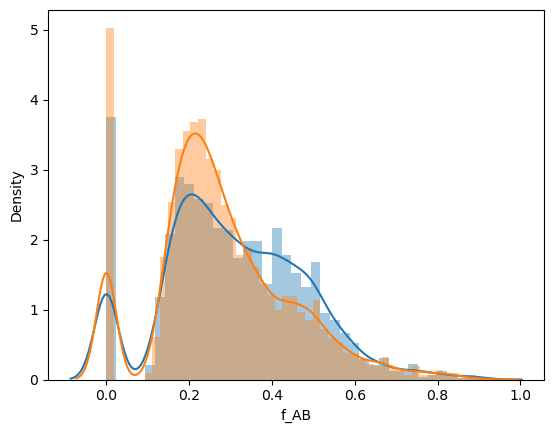

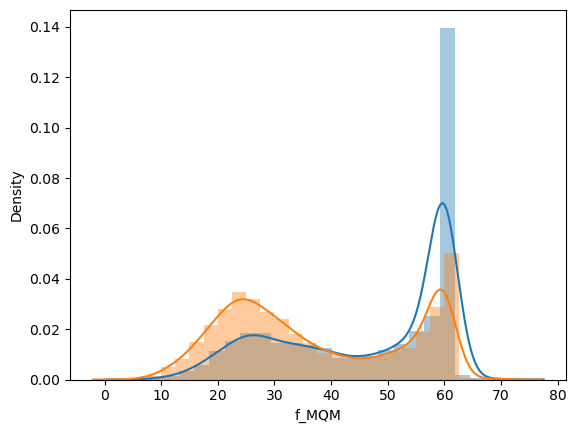

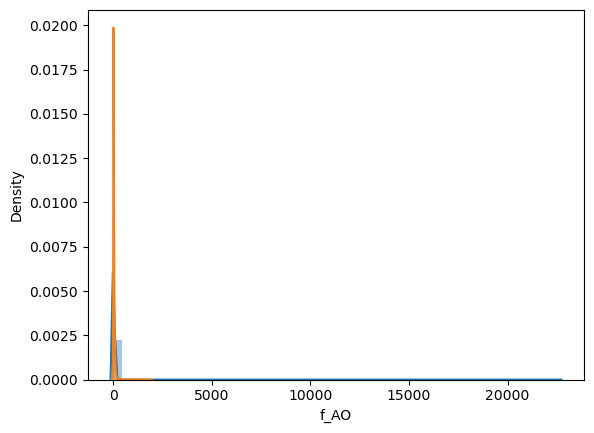

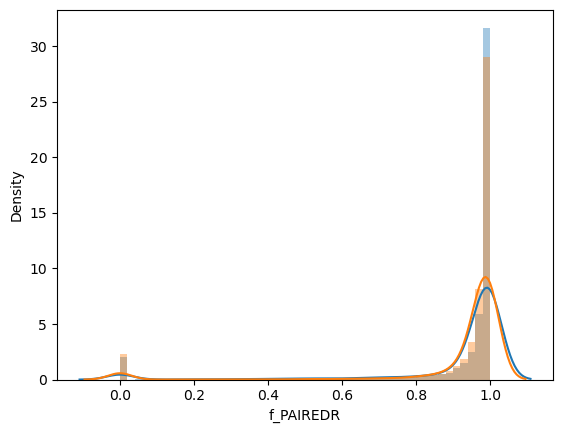

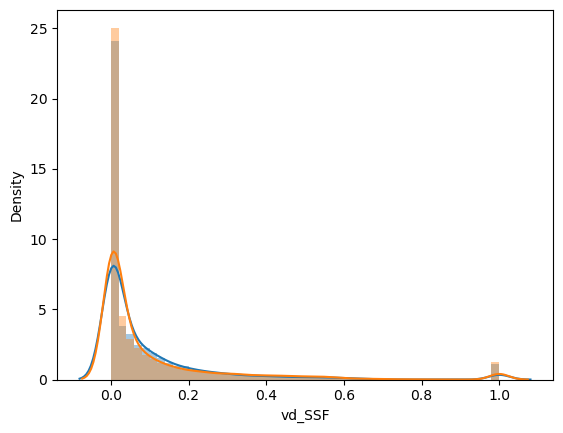

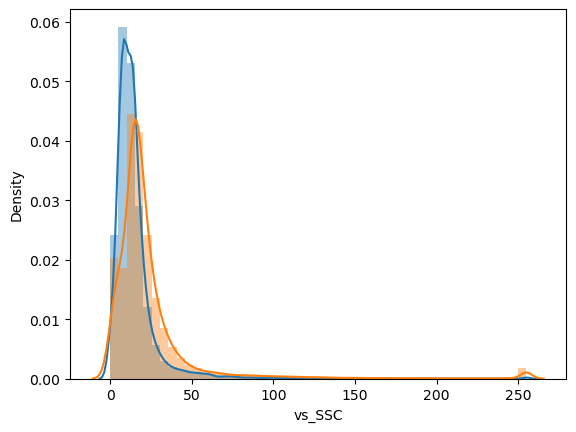

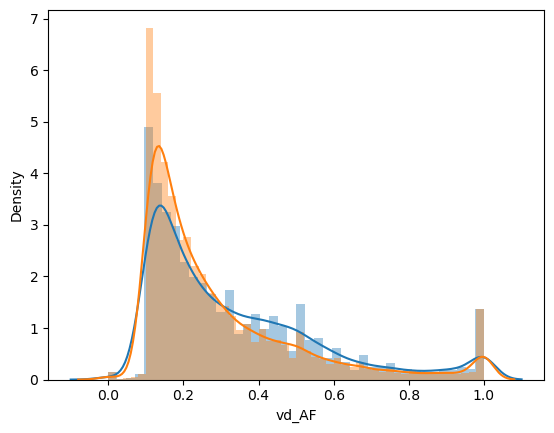

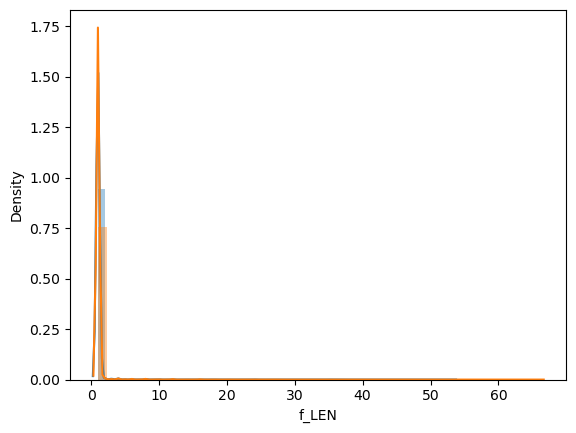

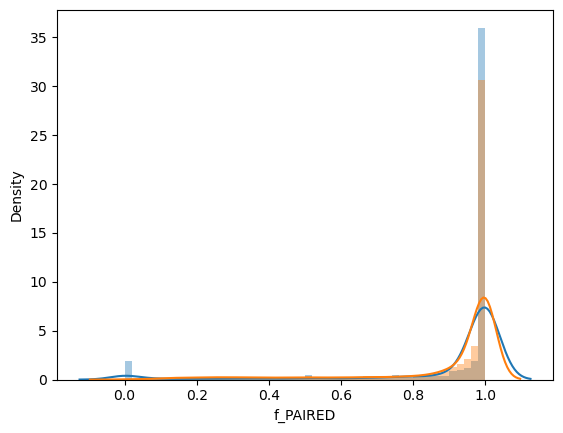

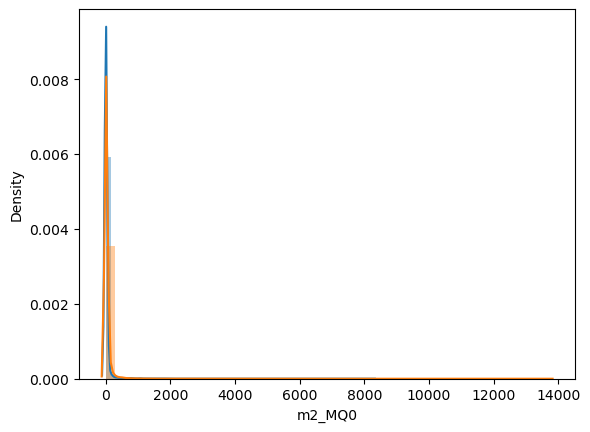

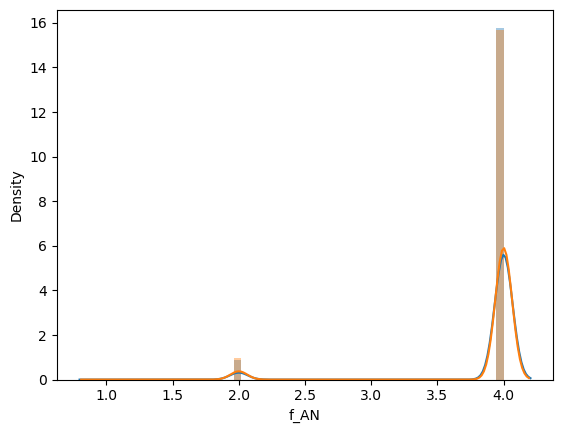

In [104]:
for feature in feature_cols:
    if not any(feature.startswith(x) for x in ['vd_', 'vs_', 'f_', 'm2_']):
        continue
    plt.figure()
    sns.distplot(df[feature])
    sns.distplot(df_test[feature])

### Groups of features

##### mutect2

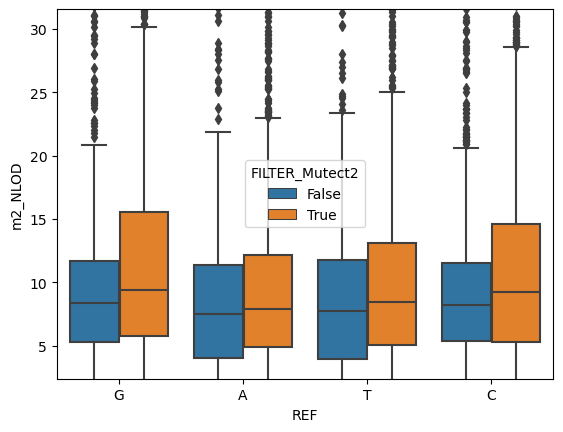

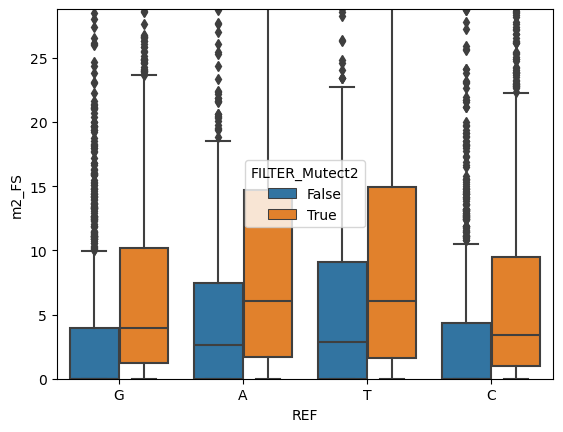

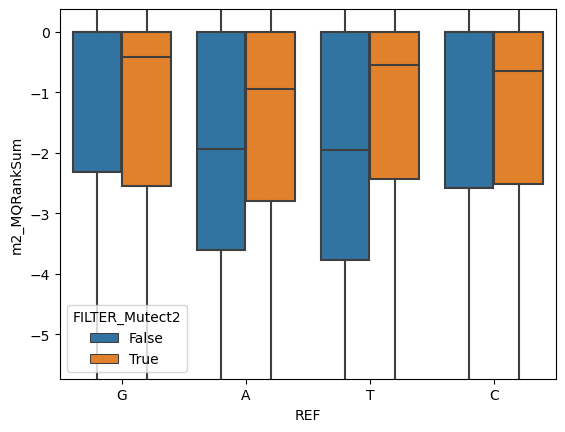

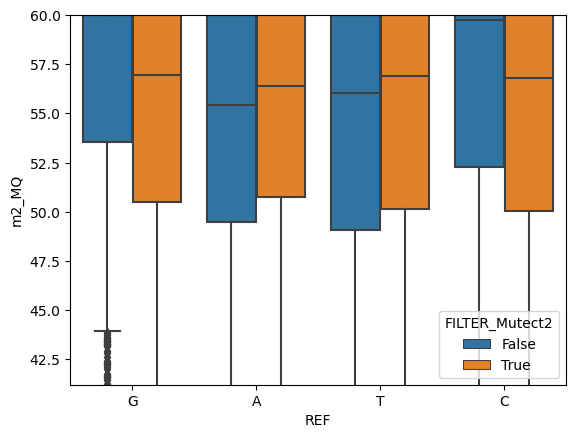

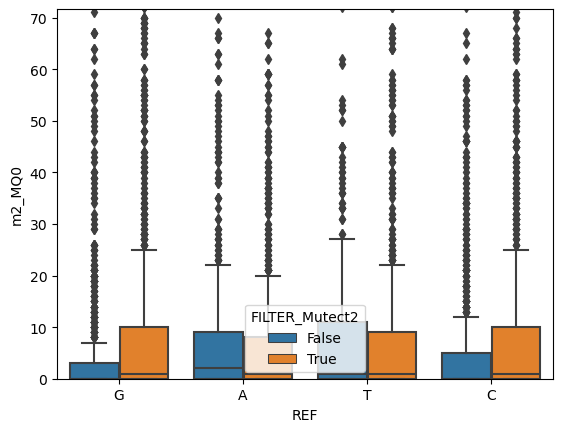

In [120]:
for feature in feature_cols:
    if not feature.startswith('m2_'):
        continue
    plt.figure()
    plt.ylim(df[feature].quantile(0.05), df[feature].quantile(0.95))
    sns.boxplot(x="REF", y=feature, hue='FILTER_Mutect2', data=df)

##### Freebayes

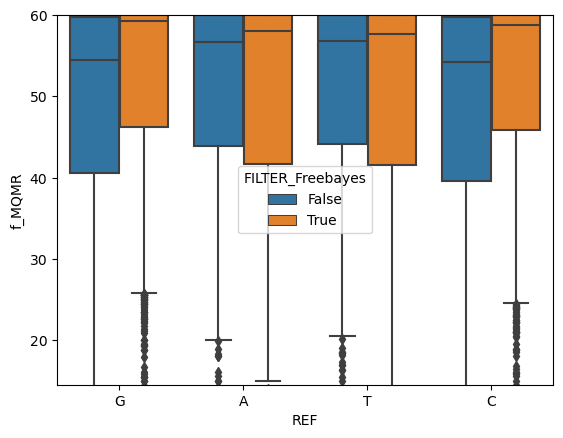

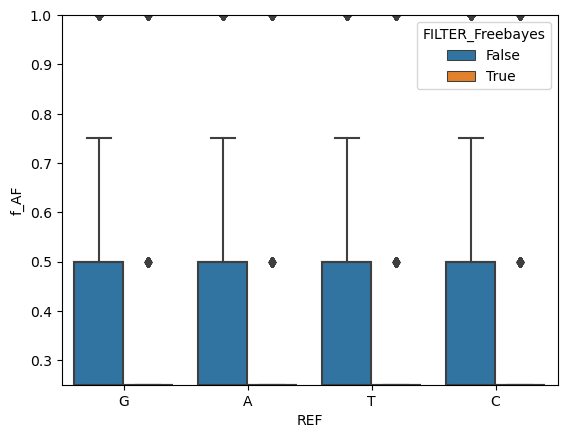

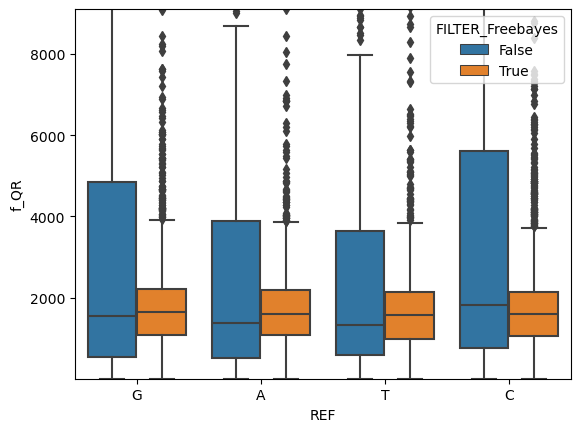

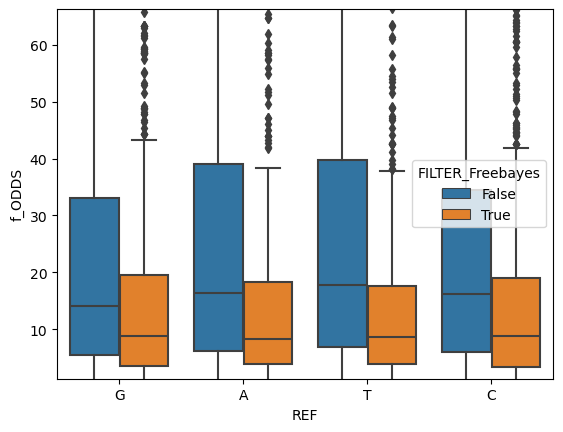

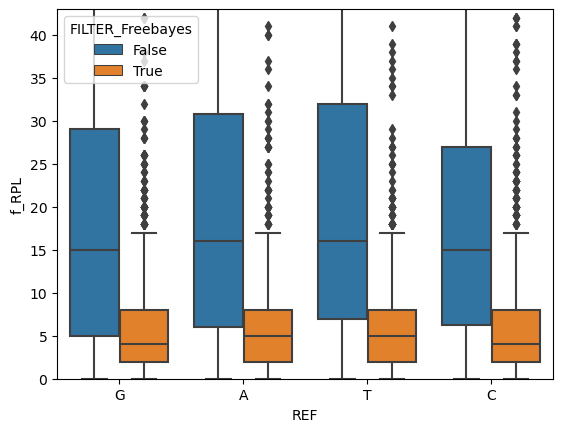

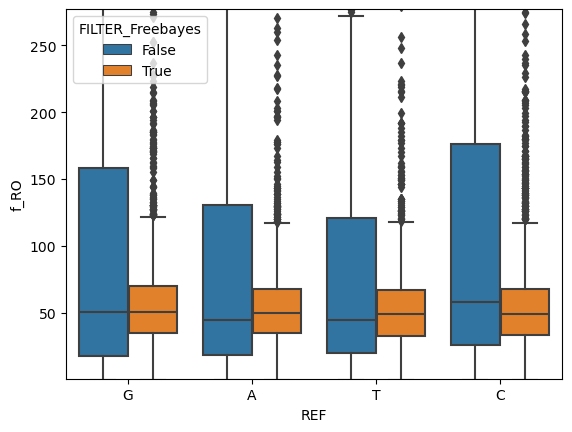

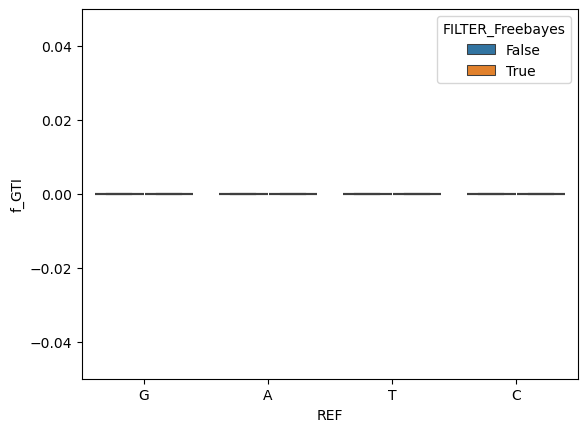

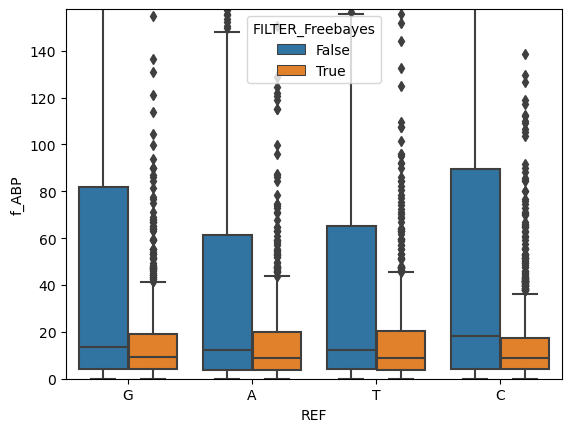

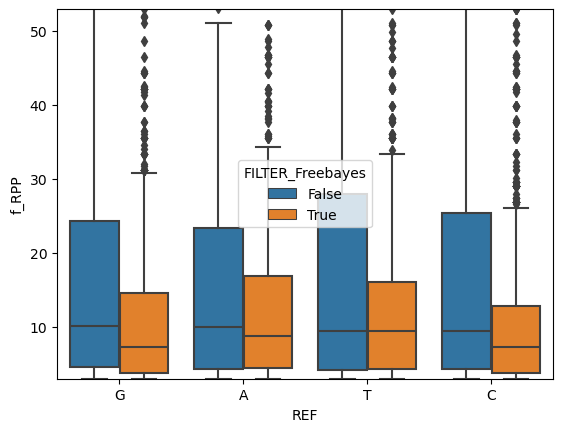

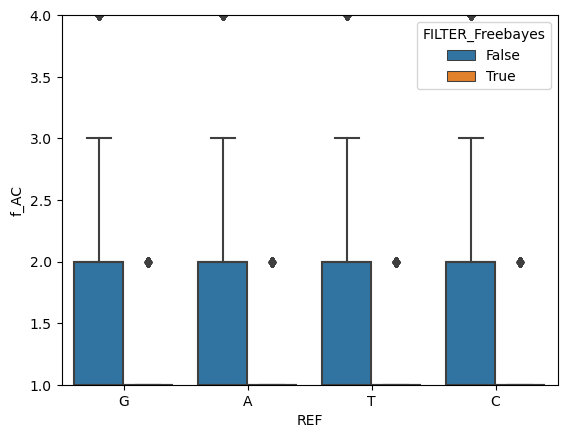

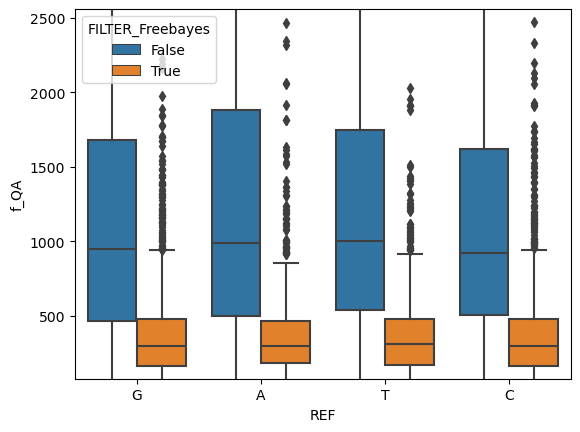

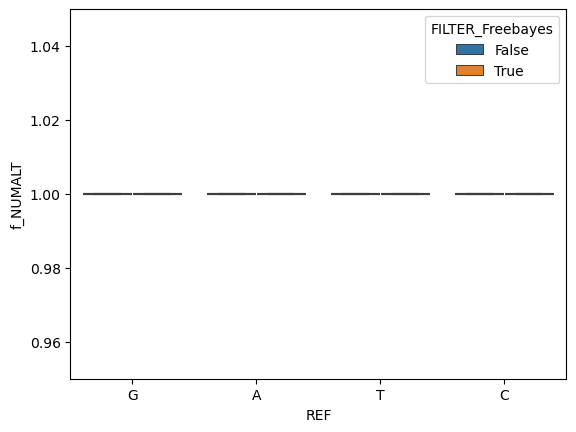

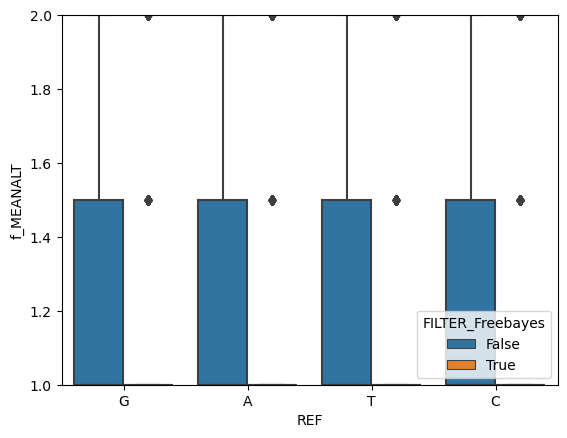

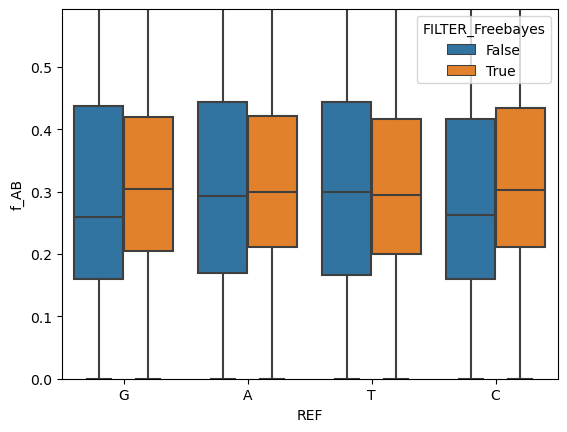

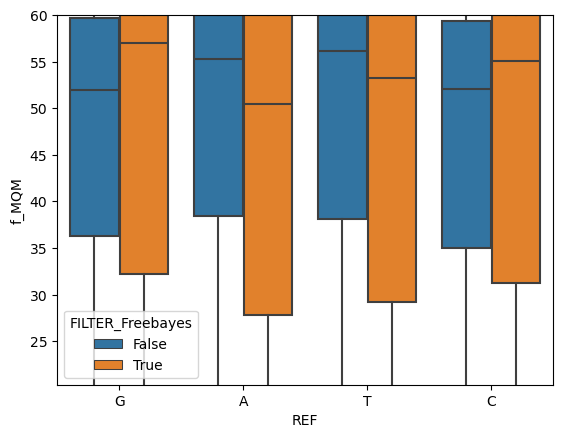

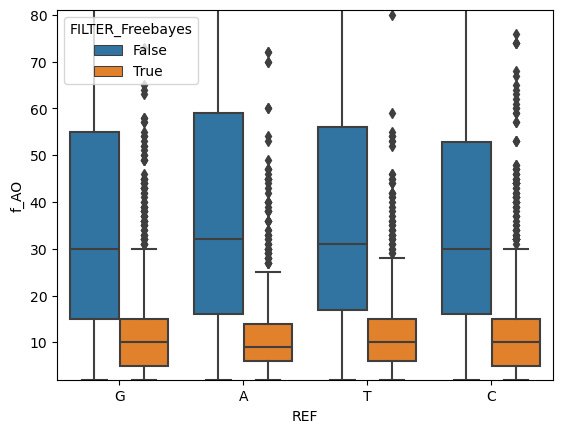

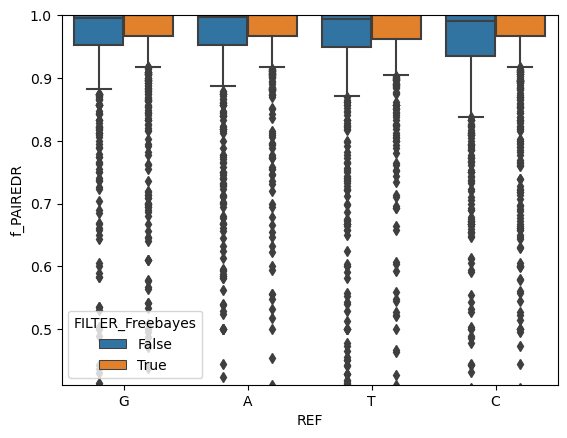

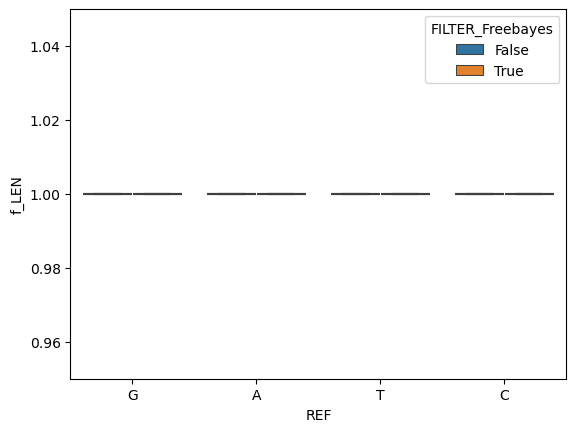

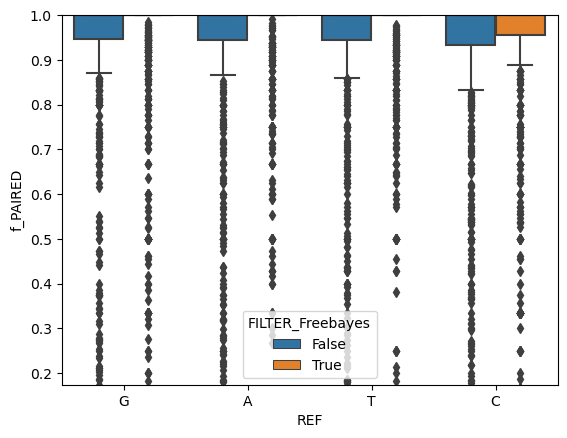

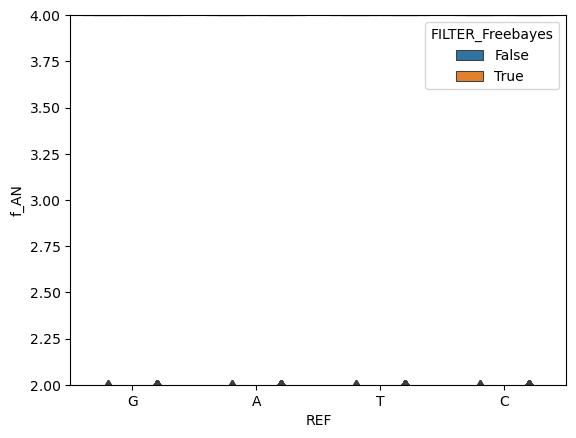

In [122]:
for feature in feature_cols:
    if not feature.startswith('f_'):
        continue
    plt.figure()
    plt.ylim(df[feature].quantile(0.05), df[feature].quantile(0.95))
    sns.boxplot(x="REF", y=feature, hue='FILTER_Freebayes', data=df)